## Introdução

Esse jupyter notebook foi desenvolvido para introduzir e abordar com razoável profundidade os principais conceitos e fórmulas por trás de tarefas de classificação em Machine Learning baseadas em classificadores lineares. Esse primeiro notebook da série serve também para introduzir os conceitos necessários para a compreensão posteriora dos próximos notebooks desta série, que vão de desde a introdução de classificadores lineares (este primeiro), seguindo para classificadores lineares simples como Perceptron, Regressão logística e Linear Support Vector Classifier e depois expandindo para modelos mais complexos e não lineares com foco em redes neurais e o algoritmo de backpropagation. O algoritmo de Gradient Descent e suas variações também serão abordados em maior profundidade a partir do terceiro notebook da série.


## Sumário
    
- 1.Aprendizagem Supervisionada
    
    - 1.1 Feature Space
    - 1.2 Vetorização
        - 1.2.1 Demonstração
        
        
        
- 2.Tarefas de Classificação
    - 2.1 Classificação binária
    - 2.2 Classificação multi-classes
        - 2.2.1 One vs Rest (OvR)
        - 2.2.2 One vs One (OvO)
    - 2.3 Modelo generativo vs discriminativo
        - 2.3.1 Diferença entre os modelos        
 
 
 
- 3.Classificadores Lineares

    - 3.1 Função Linear
    - 3.2 Coeficiente Linear ou bias
    - 3.3 Classe positiva e negativa
    - 3.4 Superfícies de decisão
    - 3.5 Thresholding Function
    
    
- 4.Subespaços e Noções Algébricas
    - 4.1 Vetor normal
    - 4.2 Ângulo $\theta$ entre vetores
    - 4.3 Norma de um vetor
        - 4.3.1 L1-Norm
        - 4.3.2 L2-Norm
    - 4.4 Medidas de distância vetorial
    <br><br>
 
 
- 5.Equação do Hiperplano
    - 5.1 Visualizando o Hiperplano em $\mathbb{R}^2$
    - 5.2 Visualizando o Hiperplano em $\mathbb{R}^3$
    - 5.3 Generalizando a equação para $\mathbb{R}^n$
    


- 6.Referência bibliográfica
    
    
## Importação das bibliotecas


In [1]:
import sys
sys.path.append("C:\\Users\\rodri\\Desktop\\Relacionados a Código\\github_Rodrigo\\Notebooks\\DataViz_Obj")

In [2]:
# Importa módulos built-ins
import warnings
from IPython.display import Image

# Impede mensagens de aviso de serem exibidas no notebook
warnings.filterwarnings("ignore")

# Importa pacotes gerais da comunidade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importa funções específicas
from numpy.random import rand
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Importa módulos e scripts próprios
import visualizacoes as vs
from Visuals.plots import Plot 
from MathPack import display as ds
from MathPack import functions as mfuncs
import datasets

In [3]:
plots = Plot()

Para minimizar o código a frente, crio aqui alguns presets para utilizar como rótulo dos axis gerados

In [4]:
standard_label = ['$x$', '$y$', '$z$']
feature_label = ['$X_1$', '$X_2$', '$X_3$']
function_label = ['$x$', '$f(x)$']


## 1.  Aprendizagem Supervisionada

Tarefas de aprendizado de máquina envolvem descrever um __cenário real__ descrito por um conjunto de __dados históricos__ através de um __modelo matemático__. O modelo matemático passa então a representar aquele cenário como um conjunto de regras e funções matemática, e a partir disso, pode ser usado para simulações, previsões, segmentações, etc.  Esse modelo é descrito por uma função $f \, : \, X \, \rightarrow \, Y$, onde $X$ e $Y$ são espaços vetoriais chamados __input space__ e __output space__ respectivamente. Em resumo, é uma função que recebe um input $x$ e retorna um output $y$:

$$\normalsize f(x) = y$$

Com base nas especificidades do modelo composto por $f$, o tipo de output $y$ desejado e os dados $x$ disponíveis, o campo acaba sendo dividido em 3 grandes categoriais:

<img src='https://www.tutorialandexample.com/wp-content/uploads/2019/09/understanding-different-types-of-machine-learning.png' width='200px'>

Enquanto que a aprendizado por reforço que ainda está começando a ser aplicada para ciência de dados na indústria, as duas outras (supervisionada e não supervisionada) tem sido extensivamente aplicadas ao mercado, tanto que recentemente a mescla entre aprendizagem supervisionada e não supervisionada levou a mais um sub-grupo de aprendizagem, a aprendizagem semi-supervisionada. Nesse e nos próximos notebooks dessa série, a aprendizagem supervisionada será introduzida junto com os tipos de tarefas supervisionadas. A aprendizagem não supervisionada, assim como a supervisionada, merece uma série inteira de jupyter notebooks como estes apenas dedicado à ela.

### 1.1 Feature Space

O input space é normalmente referido como __feature space__ dentro de machine learning. O input $x$ é usualmente representado como um __vetor de features__ (_feature vector_) sendo que cada dimensão espacial desse espaço vetorial (leia-se _feature_) representa uma das variáveis de informação que se tem disponível nos dados históricos, e cada vetor $x$ é portanto uma observação, uma medição desse cenário. A matriz $X$ com $n$ variáveis está representando uma feature space $n$-_dimensional_ e cada observação $x_i$ será um vetor composto por $n$ componentes $\left \{ x \in \mathbb{R}^n \right \}$:

$$\normalsize x = \begin{bmatrix} x_1 \\ x_2\\ \vdots \\x_n \end{bmatrix}$$

$y$ por sua vez, _se existir nos dados históricos_, será um rótulo associado a cada observação $x$, que pode ser exemplificado com uma __matriz aumentada__ de $m$ linhas por $n + 1$ colunas representada por:

$$\normalsize (X,y) = \left[\begin{array}{ccc|c} x_{11} & \cdots & x_{1n} & y_1\\ x_{21} & \cdots & x_{2n} & y_2 \\ \vdots & \vdots & \vdots & \vdots\\ x_{m1} & \cdots & x_{mn} & y_m\end{array} \right]$$

Onde cada linha da matriz representa uma observação $x$ e a última coluna representa o respectivo rótulo ou valor resposta da observação. O rótulo $y$ na aprendizagem supervisionada possui a mesma finalidade que as respostas ao fim de um livro de exercícios para o vestibular: se não for possível acompanhar o desempenho durante o treino, será impossível determinar o quão bom foi seu preparo para o vestibular em si. Algoritmos de ML em geral são interativos e trabalham com a _minimização de risco estrutural ou empirica_. O termo risco nesse contexto é o _erro_ ou _custo_ do modelo, ou seja, esses algoritmos procuram a cada interação minimizar o erro do modelo, até que este seja satisfatóriamente baixo, e a única forma de fazer isso, é tendo o rótulo $y$, análogo as respostas no fim do livro. Isso também tem implicações gerais na ótica do mercado, supondo uma empresa deseje aplicar aprendizagem supervisionada para criar um modelo que prevê quais clientes são potenciais inadimplentes, eles precisarão se certificar de duas coisas: 

- Existe uma base histórica estruturada que contenha a variável que determina de alguma forma quais clientes tornaram-se inadimplentes para ser transformada em variável alvo.
- Certificar-se que todas as variáveis da base histórica usadas para treinar o modelo continuam sendo armazenadas e vão estar disponíveis priori ou durante a utilização do modelo. Por exemplo, supondo que a variável $n_i$ foi utilizada para treinar o modelo: se essa variável não for mais informada pelos novos clientes (clientes que o modelo deverá classificar), essa será uma informação crítica e indisponível que o modelo aprendeu a utilizar para gerar as classificações, sem ela, o modelo perde seu poder preditivo, especialmente se o mesmo for uma função complexa que leva em consideração possíveis relações de dependência entre as features. Nesse caso, ou será necessário inferir a medição dessa variável ausente através de data imputation (o que cria uma variância e incerteza ainda maior na previsão final), ou será necessário retreinar o modelo sem essa feature.


### 1.2 Vetorização

O campo inteiro de ciência de dados e aprendizado de máquina foi construído em uma espécie de mescla entre diferentes campos: ciência da computação, estatística e cálculo, e esses sendo finalmente incorporados à realidade industrial do mercado. Dentro disso, uma das grandes contribuições especialmente da ciência da computação nessa área é a utilização da álgebra (em especial a álgebra linear) para implementar as técnicas e algoritmos em questão.

<img src='https://qph.fs.quoracdn.net/main-qimg-8a42228263b908bec0de477a66c0f83e' width='300px'>

Aplicar operações vetorizadas aos dados reduz drásticamente o tempo de execução das computações e operações matemáticas, especialmente por dispensar a necessidade de __loops__ para interagir sobre arrays de valores, o que seria bem mais pesado computacionalmente e não escalaria bem para qualquer volume razoável de dados. No caso do python, as estruturas de dados nativas do python (listas, tuplas e dicionários principalmente) não são otimizadas para para operações matemáticas e é aí que entra o popular `Numpy` (_Numeric Python_). O numpy faz uso de linguagem de baixo nível C (a qual os interpretadores de python são escritos em geral) para armazenar e acessar vetores e matrizes de maneira performática (através de _strides_, numpy _broadcasting_, entrou outros termos que fogem muito ao propósito de se aprofundar aqui) permitindo operações matemáticas vetorizadas e portanto muito mais performáticas e eficientes em consumo de memória. 

#### 1.2.1 Demonstração

Um bom exemplo para demonstrar isso é o __dot product__ (ou produto escalar ou ainda produto interno), uma operação entre dois vetores de mesmo tamanho que retorna um __escalar__  muito frequentemente utilizada em ciência de dados e ML. O dot product entre dois vetores $a$ e $b$ em $\mathbb{R}^n$, será basicamente uma multiplicação element-wise seguido da somatória desses produtos:

$$\normalsize \left \langle a,b \right \rangle = \sum_{n}a_n b_n \,\,=\,\, a_1 b_1 + a_2 b_2 + a_3 b_3 + \cdots a_n b_n$$

Diferentes notações são utilizadas para representar o produto escalar entre dois vetores: $a \cdot b$, $ab$,  $\left \langle a, b \right \rangle$ ou ainda $a^T b$, onde $T$ é a <strong>transposta</strong> do vetor. Para simplificar, o dot product entre dois vetores será representado pela notação $\left \langle a, b \right \rangle$, que costuma ser utilizada em alguns papers para representar por exemplo o inner product, equivalente ao produto escalar. O importante nesse caso é garantir que o calculo correto seja computado. Isso é especialmente crítico quando a multiplicação é feita entre matrizes de vetores: o produto escalar entre duas matrizes $A$ e $B$ exige que o número de colunas de $A$ seja igual ao número de linhas em $B$ e a matriz resultante terá o número de __linhas__ de $A$ e o número de __colunas__ de $B$. Isso também indica que a __ordem dos produtos__ nesse tipo de operação __altera__ o resultado. Supondo que $X$ seja uma matriz 3x3 onde cada linha $x_i$ é um vetor e $w$ é um vetor tridimensional sendo $\left \{ w; x_i \in \mathbb{R}^3 \right \}$, o dot product entre eles será possível:
    
(1) $$\normalsize \left \langle X,w \right \rangle = \begin{bmatrix}x_{11} & x_{12} & x_{13}\\x_{21} & x_{22} & x_{23}\\ x_{31} & x_{32} & x_{33}\end{bmatrix} \cdot\begin{bmatrix} w_1\\w_3\\w_2\end{bmatrix} = \begin{bmatrix} \left \langle x_1,w \right \rangle \\\left \langle x_2,w \right \rangle\\\left \langle x_3,w \right \rangle\end{bmatrix}$$
 
(2) $$\normalsize  \left \langle X,w \right \rangle = \begin{bmatrix} (x_{11} \cdot w_1) + (x_{12} \cdot w_2) + (x_{13}\cdot w_3) \\  (x_{21} \cdot w_1) + (x_{22} \cdot w_2) + (x_{23}\cdot w_3) \\  (x_{31} \cdot w_1) + (x_{32} \cdot w_2) + (x_{33}\cdot w_3)\end{bmatrix}$$



Agora vamos mostrar a diferença de realizar essa operação com python nativo e utilizando numpy arrays. Primeiro cria-se uma matriz $X$ de 100 linhas por 7 colunas e um $w$ com 7 linhas (componentes), de forma que esses vetores possuem compatibilidade de dimensões permitindo a operação:

In [5]:
# Cria arrays contendo dados para testar
X = np.random.rand(100, 7)
w = np.random.rand(7)

# Exibe as matrizes
ds.display_matrix(X, label='X', n_rows=5)
ds.display_vec(w, label='w')

<br>$X = \begin{bmatrix}0.38&0.85&0.61&0.57&0.71&0.84&0.47\\0.62&0.15&0.46&0.08&0.55&0.55&0.28\\0.83&0.93&0.81&0.02&0.55&0.71&0.73\\0.67&0.04&0.12&0.95&0.79&0.88&0.63\\0.08&0.23&0.16&0.97&0.61&0.71&0.18\end{bmatrix}$<br><br>

Dimensões da matriz: (100 x 7)



<br>$w = \begin{bmatrix}0.53\\0.41\\0.99\\0.75\\0.33\\0.14\\0.54\end{bmatrix}$<br>

Agora implementa-se duas funções, uma para computar o dot product com _nested loops_, ou seja, loops dentro de loops, para acessar a coluna $j$ da linha $i$, e a outra função implementa o dot product utilizando o numpy. A função `dot_product_loop` foi feita apenas pensando no dot product entre uma matriz e um vetor nesta ordem. Para o exemplo não é necessário escrever uma função mais robusta

In [6]:
# Executa o dot prod <A,v> com for loop
def dot_product_loop(A,v):
    # aloca um vetor de zeros com n_samples
    dot = [0]*len(A)
    # Intera sobre cada vetor linha da matriz A
    for i, x_i in enumerate(A):
        # Intera sobre cada componente do vetor v
        for j, w_j in enumerate(v):
            dot[i] += x_i[j] * w_j
    # retorna o vetor
    return dot

Já a função `dot_product_numpy` simplesmente aplica a função `numpy.dot` e portanto suporta quaisquer matrizes ou vetores desde que esses tenham dimensões compatíveis:

In [7]:
# Implementação numpy do dot product
def dot_product_numpy(A,v):
    # retorna o dot product utilizando numpy
    return np.dot(A,v)

Primeiramente testa-se o resultado de ambas as funções, especialmente para garantir que ambas retornam o mesmo resultado. No caso apenas os 5 primeiros vetores de $X$ são usados:

In [8]:
print('Função dot_product_loop:')
ds.display_vec(dot_product_loop(X[:5,:], w))

print('\nFunção dot_product_numpy:')
ds.display_vec(dot_product_numpy(X[:5,:], w))

Função dot_product_loop:


<br>$\begin{bmatrix}2.19\\1.33\\2.32\\1.93\\1.43\end{bmatrix}$<br>


Função dot_product_numpy:


<br>$\begin{bmatrix}2.19\\1.33\\2.32\\1.93\\1.43\end{bmatrix}$<br>

Agora que garantimos que as funções retornam o mesmo resultado, vamos ver a diferença de tempo de execução, e para isso uma dica é utilizar a função <a href='https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit'>%timeit</a>, um comando mágico built in do Python que retorna o tempo médio de execução de uma expressão ou função passada

In [9]:
print('Função dot_product_loop:')
%timeit dot_product_loop(X,w)

print('\nFunção dot_product_numpy:')
%timeit dot_product_numpy(X,w)

Função dot_product_loop:
542 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Função dot_product_numpy:
1.48 µs ± 69.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


A diferença de performance é bem sensível entre ambas as funções. A função numpy foi praticamente __300 vezes mais rápido__ que a implementação com python puro. De fato, a diferença tende a aumentar conforme o tamanho das matrizes aumenta, e é justamente por isso que utilizar loops para operações matriciais em grande escala é uma péssima ideia, e operações vetorizadas sempre serão preferíveis. Além de evitar loops, operações com matrizes e tensores permitem também a __paralelização__ das operações em múltiplos threads, e podem ser acaleradas ainda mais ao serem processadas em GPU's (graphic processing unit) - as famosas placas de vídeo, e também em TSU'S (tensor processing unit), algo que faz bastante sentido se pensarmos que GPU's são efetivamente criadas para processarem __imagens__, que nada mais são do que matrizes de pixels, ou tensores se considerarmos os diferentes canais de cor da imagem sendo cada um uma matriz própria. Por exemplo, uma imagem 3 x 3RGB é um tensor com 3 matrizes de 3 x 3:

<img src='https://e2eml.school/images/image_processing/three_d_array.png' width='300px'>


## 2. Tarefas de Classificação

Definido que o problema é de aprendizagem supervisionada, é preciso ainda entender qual tipo de problema de aprendizagem supervisionada. A variável alvo, como qualquer variável em machine learning, será numérica e pode ser portanto <a href='https://pt.wikipedia.org/wiki/Vari%C3%A1vel_(estat%C3%ADstica)'>contínua ou discreta</a>. O tipo de valor de $y$ define o tipo de problema supervisionado: regressão ou classificação. Supondo que um modelo, com base em algumas variáveis, prevê qual a temperatura ambiente em determinada localização, esse seria um modelo de regressão visto que entrega um valor contínuo indicando a temperatura esperada. No entanto, se precisamos de um modelo que não entregue necessariamente a temperatura esperada, mas sim se a temperatura está quente ou fria, então trata-se de uma tarefa de __classificação__:

<img src='https://cdn.hashnode.com/res/hashnode/image/upload/v1588031775489/yRnlkTsKH.jpeg' width='500px'>

Resumindo, em essencia, classificadores associam o __input__ à um __rótulo__ como output, efetivamente uma classificação. Já em regressão, a premissa muda bastante embora a matemática por trás possa ser, e de fato é, semelhante à classificação: o modelo de regressão __descreve__ a variável dependente $y$ como função do input $x$, e por isso o seu output é efetivamente uma medição da variável. Em estatística por exemplo, especialmente no que tange regressões e modelagem, $y$ costuma ser chamado de __variável dependente__ e as features $x$ são chamadas de variáveis __independentes__ pois justamente assume-se que $y$ é uma combinaçõa linear de outras variáveis assumidamente independentes (inclusive é a partir desse assunto que exploramos a __multicolinearidade__ entre variáveis independentes). Para começar a explorar melhor tarefas de classificação, é carregado um dataset de dados __rotulados__:

In [10]:
X, Y = datasets.Load_dataset_R2()

`X_2d` é uma matriz de 300 observações como vetores linha (<em>n_samples</em>) com 2 variáveis (<em>n_features</em>), e `Y_2d` é o vetor com o rótulo para as 300 observações. O feature space $X$ nesse caso é bidimensional ($X \in \mathbb{R}^2$): 

In [11]:
ds.display_matrix(X, n_rows=5, label='X')
ds.display_vec(Y[:5], label='Y')

<br>$X = \begin{bmatrix}2.67&2.23\\0.36&2.15\\2.66&2.32\\1.97&2.76\\2.08&3.08\end{bmatrix}$<br><br>

Dimensões da matriz: (300 x 2)



<br>$Y = \begin{bmatrix}1\\1\\1\\1\\1\end{bmatrix}$<br>

Com esse dataset já é possível fazer uma demonstração de tarefas de classificação, porém antes disso será é necessário introduzir mais conceitos.

### 2.1 Classificação Binária

A variável resposta $Y$ é uma variável discreta e binária, que assume apenas dois valores inteiros: 0 ou 1, __rótulos__ ao invés de valores contínuos, e estão distribuídos em dois grupos de registros. Esse caso pode ser  definido como um problema de __classificação binária__. Se existem 2 classes apenas, subentende-se que a feature space será dividida em duas regiões, uma para a classe 0 e uma para a classe 1. O caso binário pode ser expandido para o caso onde a variável alvo assume 3 ou mais valores, configurando assim uma tarefa de multi-classes: 

<img src='https://media.geeksforgeeks.org/wp-content/uploads/classification-1.png' width='450px'>

### 2.2 Classificação multi-classes

Dois pontos relevantes a serem considerados aqui sobre classificiação múltipla. Em primeiro lugar, embora existam alguns algoritmos , em geral mais sofisticados, que suportam naturalmente uma previsão de múltiplas classes, nem todos os algoritmos de Machine Learning são naturalmente compatíveis com previsões de múltiplas classes. Uma abordagem para essas tarefas é de quebrar em tarefas bináres menores de forma que classificadores binários (chamados de classificadores base) possam ser treinados em conjunto para resolver o problema multi-classes. Dentro disso, duas __estratégias__ são bastante populares:

#### 2.2.1 One vs Rest (OvR)

Também chamado de <em> One vs All (OvA)</em> ou ainda <em>One Against All (OAA)</em>. Nessa estratégia, um classificador base é treinado para __cada__ classe possível, de forma que cada classificador torna-se especializado em distinguir essa classe do resto (por isso o nome <em>One vs Rest</em>). Dessa forma, para fazer uma nova previsão, cada classificador base retornará um score de confiança __contínuo__ de sua respectiva classe, e a classe com maior confiança será a classificação final através de uma simples função __arg max__ por exemplo. Supondo que existam 3 classes possíveis para um sample $x$, A,B e C, um classificador binário será treinado: 

- Classificador $f_1(x)$ treinado com classes A vs [B,C], 
- Classificador $f_2(x)$ treinado com classes B vs [A,C],
- Classificador $f_3(x)$ treinado com classes C vs [A,B]

A previsão final será: $y_k = \text{arg max} f_k(x)$, ou seja, a classe que recebeu a maior confiança por seu respectivo classificador

#### 2.2.1 One vs One (OvO)

Essa estratégia é semelhante à <em>OvR</em>, porém os classificadores não são mais especializados em uma classe versos as demais, mas sim em todas as situações de distinções existentes entre as classes, de forma que, dado que existem $K$ classes existentes, serão treinados $\frac{K(K - 1)}{2}$ classificadores e após isso, um algoritmo de __votação__ será utilizado para definir qual a classe final, onde a classe com mais votos é a classe final. Assumindo o mesmo exemplo acima, para 3 classes, tem-se o mesmo número de classificadores base se comparado com a estratégia OvR, mas com a premissa visivelmente diferente: 

- Classificador $f_1(x)$ treinado com classes A vs B, 
- Classificador $f_2(x)$ treinado com classes A vs C,
- Classificador $f_3(x)$ treinado com classes B vs C,

A classificação final será: 

$$\normalsize y_k = v\,\,(\,f_1(x)\,, f_2(x)\,, \cdots\, f_k(x))$$ 

Onde $v$ é uma função genérica qualquer que faz a votação da classe e $k = \frac{K(K - 1)}{2} = 3$ para o exemplo acima

Existem problemas de ambiguidade e desbalanceamento na confiança dos classificadores base que consistem em problemas consideráveis nas abordagens acima. Por opção, a classificação multi-classes e seus obstáculos não serão aprofundados agora, pois é mais simples e natural estudar tarefas e algoritmos e classificação binária, e depois generalizar suas aplicações para as heuristicas acima em casos de multiplas classes possíveis.


### 2.3 Modelo generativo vs discriminativo

Classificadores podem ainda serem divididos em dois grupos gerais de modelos: _generativos_ e _discriminativos_. Em essencia, classificadores de machine learning são modelos estatísticos que trabalham pesadamente com a teoria da propabilidade para modelar variáveis. O output do modelo $f(x)$ encontrado pelo algoritmo pode ser interpretado como um output probabilístico:

$$\normalsize f(x_i) = P(y\,|\,x)$$

A expressão acima é uma _probabilidade condicional_ que pode ser lida como "_a probabilidade de $y$ dado que ocorreu $x$_". A questão é que a probabilidade gerada pelo modelo pode ser simplesmente um score discriminativo, ou uma probabilidade nativa do modelo dada pela distribuição conjunta (_joint probability_):

$$\normalsize P(x,y)$$ 

Essas abordagens diferenciam modelos discriminativos de modelos generativos, muito bem ilustrada nesse exemplo de redes generativas (GANs) do <a href='https://developers.google.com/machine-learning/gan/generative#:~:text=A%20generative%20model%20includes%20the,to%20a%20sequence%20of%20words.'>google</a> sobre esses modelos:

<img src='https://developers.google.com/machine-learning/gan/images/generative_v_discriminative.png'>

O modelo discriminativo não se importa com a distribuição de $x$ e de $y$, ele é "direto" e simplesmente modela uma função para separar o feature space corretamente utilizando como supervisão o erro das previsões do modelo, e a partir dessa função, ele pode atribuir um score a qualquer nova observação e classificar, sem considerar a distribuição dos dados no feature space. O modelo generativo já é mais "minuncioso" e se importa em entender a distribuição dos dados: antes de fazer previsões, o algoritmo aprende a distribuição conjunta de $x$ e $y$, e a partir dessa distribuição, o modelo pode tanto fazer previsões sobre uma nova observação $x$ especialmente com a utilização do famoso __teorema de bayes__:

$$\normalsize P(A \,|\, B) = \frac{P(B \,|\, A)\,P(A)}{P(B)}$$

#### 2.3.1 Diferenças entre os modelos

Obviamente, modelos generativos são mais complexos pois modelam antes a distribuição dos dados para depois usá-la como função de classificação. A vantagem deste pipeline mais elaborado é que por conhecer a distribuição $P(x,y)$, o modelo também será capaz de gerar novos dados sintéticos que respeitem a distribuição original, e por isso esses modelos recebem o nome de _generativos_, e são usados em aplicações além da tarefa de classificação. Em contrapartida, diversos papers evidenciam que modelos discriminativos tendem a ser mais robustos e flexíveis além de serem em geral mais simples para tarefas de classificação, inclusive mencionado no famoso paper _On discriminative vs. generative classifiers: A comparison of logistic regression and naive bayes_ de Andrew Ng . 


## 3. Classificadores Lineares

Começando a ser um pouco mais técnico, antes foi mencionado que em classificações binárias, _a feature space será dividida em duas regiões de decisão_ para criar o classificador. A questão portanto vira __como__ essa divisão é feita. Essa é exatamente uma das características utilizadas para agrupar modelos semelhantes, e sendo assim, chegamos aos __classificadores lineares__. Essa ordem de algoritmos de classificação recebe o termo "linear" pois a divisão da feature space é feita através de uma __linha___, ou, mais precisamente, com uma função linear que desenha um plano $n$-dimensional que detalharemos mais a frente neste notebook. Alguns exemplos de __classificadores lineares__ generativos e discriminativos:

__Generativos__

- Multinomial Naive Bayes (MNB)
- Linear Discriminant Analysis (LDA)

__Discriminativos__

- Perceptron
- Regressão Logística (Logistic Regression)
- Linear Support Vector Classifier (Linear SVC)

Para esse e os próximos notebooks, seguiremos a linha dos classificadores lineares discriminativos, para depois introduzir de maneira mais natural e intuitiva os classificadores não-lineares como Support Vector Classifiers com Kernel Trick e Redes neurais como MLPs e CNNs.


Para que classificadores lineares funcionem bem, uma premissa precisa ser assumida sobre a tarefa, a premissa de que as classes podem de fato serem separadas por uma função linear! O gráfico de dispersão pode ser usado para descrever melhor a complexidade do problema de classificação:



['set_xlabel', 'set_ylabel']
Full coords
Call: ax_scatter
Len Args 2
required 2 



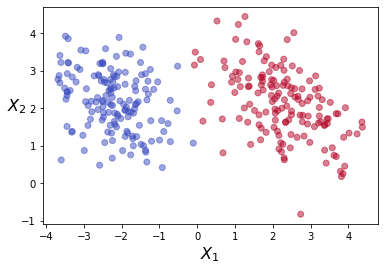

In [12]:
plots.new_plot(labels=feature_label)
plots.Scatter(X, c=Y, cmap=plt.cm.coolwarm, alpha=.5)


Observando a distribuição de $x_1$ e $ x_2$ com base em $y$, a dimensão de $x_1$ parece ser mais explicativa do que $x_2$, fazendo um trabalho melhor para separar os dados em classe positiva e negativa. sendo que cada cluster está em um range específico de valores $(x_1 , x_2)$ de forma que eles não se sobrepõem em nenhum ponto. Dessa forma, os dados são __linearmente separáveis__ pois é possível encontrar uma função de reta ótima que separe perfeitamente todos os registros de cada grupo. Esse é um case ideal para classificadores lineares, pois sabemos que é possível encontrar uma reta discriminatória que separe perfeitamente observações da classe 1 e observações da classe 0

### 3.1 Função Linear

Classificadores lineares discriminativos utilizam-se de uma __função linear__ para atribuir um score discriminativo à uma nova observação $x$. É uma função simples que descreve uma reta $n$-dimensional conforme o número de coeficientes angulares $W$ dessa função:

$$\normalsize y = wx + b$$

Onde $w$ representa o __coeficiente ângular__ da reta, que é basicamente seu ângulo, sua rotação. $b$ é chamado de __coeficiente linear__ e controla o deslocamento vertical da reta no eixo $y$, representando assim seu __intercept__, e $x$ é o input, o domínio da função. Essa é a versão simples da função que desenha uma reta uni-dimensional, mas a função pdoe ser alterada para descrever uma reta $n$-dimensional, onde $w$ e $x$ são vetores $n$-dimensionais: 

$$\normalsize x = \begin{bmatrix}x_1\\x_2\\ \vdots \\x_n \end{bmatrix} \,\,;\,\,  w = \begin{bmatrix}w_1\\w_2\\ \vdots \\w_n \end{bmatrix}$$

Como os coeficientes $w$ estão armazenados em um vetor, bem como os componentes de $x$,é possível escrever a função linear que retorna $y$ para qualquer espaço dimensional através do __dot product__ entre os vetores $w$ e $x$:

(1) $$f_{w,b}(x) = \left \langle w, x \right \rangle + b$$

(1) $$f_{w,b}(x) = \sum_n w_n\, x_n + b$$

Abaixo uma pequena demonstração do papel dos coeficientes em uma reta. Primeiro crio uma função para retornar a função linear com base em coeficientes passados:  



In [13]:
def linear_func(w,b):
    # Retorna uma função linear com os coeficientes passados
    # A função retornada recebe como argumento um array de valores de X 
    return lambda X: [np.dot(x,w) + b for x in X]

Agora, cria-se um array de inputs para a função linear, valores representando $X$. Isso é bem prático de ser feito com a função `numpy.linspace` que retorna justamente um array de valores com base em um intervalo e step. Após gerar $X$, os valores são passados para a função linear com coeficientes pré-definidos, e então gera-se os outputs de $y$:

In [14]:
# Cria um array com valores de x para passar na função (domínio)
x_ = np.linspace(-5,5,5)

# retorna os valores de y (imagem)
y_ = linear_func(w=-3,b=2)(x_)

Visualizando os valores de input e output da função:

In [15]:
ds.display_vec(x_, label='x')
ds.display_vec(y_, label='wx + b')

<br>$x = \begin{bmatrix}-5\\-2.50\\0\\2.50\\5\end{bmatrix}$<br>

<br>$wx + b = \begin{bmatrix}17\\9.50\\2\\-5.50\\-13\end{bmatrix}$<br>

Agora podemos visualizar qual a geometria desenhada pela função que, já sabemos ser uma reta uni-dimensional pois leva em consideração um coeficiente angular apenas. Abaixo a célula com o código para exibição do plot. Uma das funções, `vs.scatter_plot` é uma função própria criada para encapsular um plot de dispersão com parâmetros personalizáveis, enquanto que as demais partes do código são funções nativas do pacote `matplotlib`:

Call: ax_plot
Len Args 2
required 2 

Call: ax_scatter
Len Args 2
required 2 

Full coords
Call: ax_scatter
Len Args 2
required 2 



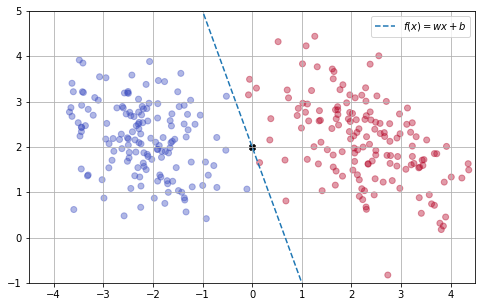

In [16]:
# Cria novo plot
plots.new_plot(lims=[(-4.5,4.5), (-1,5)], grid=True, figsize=(8,5))
plots.Function(linear_func(w=-3,b=2), X=(-5,5), plot_intercept=True, label='$f(x) = wx + b$', linestyle='--')
plots.Scatter(X, c=Y,  cmap=plt.cm.coolwarm, alpha=.4, marker='o')

Como o coeficiente linear $b = 2$, a função cruza o eixo $Y$ no ponto $(0,2)$ como esperado. Um ponto interessante é que a linha formada funciona muito bem para separar perfeitamente todos os dados da classe 1 (em vermelhor) de um lado, e as observações da classe 0 (em azul) do outro, comprovando que esse conjunto de dados é de fato linearmente separável. Para perceber o efeito que ambos os coeficientes exercem na reta, alteramos o coeficiente linear para 0 , e o coeficiente ângular terá o sinal invertido:

Call: ax_plot
Len Args 2
required 2 

Call: ax_scatter
Len Args 2
required 2 

Full coords
Call: ax_scatter
Len Args 2
required 2 



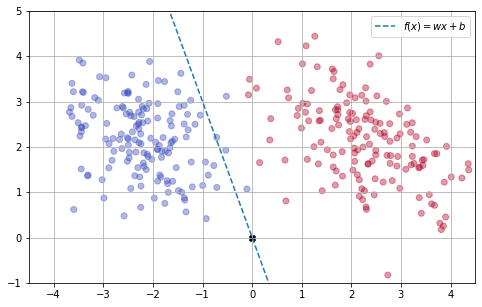

In [17]:
# Cria novo plot
plots.new_plot(lims=[(-4.5,4.5), (-1,5)], grid=True, figsize=(8,5))
plots.Function(linear_func(w=-3,b=0), X=(-5,5), plot_intercept=True, label='$f(x) = wx + b$', linestyle='--')
plots.Scatter(X, c=Y,  cmap=plt.cm.coolwarm, alpha=.4, marker='o')

Agora que o intercept da função cruza a origem do espaço vetorial $(0,0)$. Explorando um pouco mais o papel agora do coeficiente ângular, é ilustrativo perceber como inverter o sinal do coeficiente angular $w$ (de $-3$ para $3$) gerou uma rotação de 90º na função, ou seja, inverteu-se a inclinação e direção da reta. O coeficiente ângular de uma reta descreve o __slope__, a taxa de variação da função, (o conceito de derivadas em si será abordado junto com otimização de ML nos próximos notebooks). A taxa de variação de uma função linear é sempre constante (ou seja, é a mesma em qualquer ponto da função) e pode ser descrita como a variação de $y$ divido pela variação de $x$: 

(1) $$\normalsize w = \frac{\Delta y}{\Delta x}$$

(2) $$\normalsize w = \frac{y_{[\text{f}]} - y_{[\text{i}]}}{x_{[\text{f}]} - x_{[\text{i}]}}$$

Em outras palavras, um coeficiente angular $w = 3$ em uma reta significa que quando $x$ varia em uma ($1$) unidade, $y$ aumenta em $3$ unidades, e analogamente, se $w = -3$, então $y$ diminui em $3$ unidades. Isso ajuda a dar um pouco de compreensão sobre o que classificadores lineares (e regressões também) estão fazendo aos dados: ajustando funções lineares da melhor forma possível. 

### 3.2 Bias

O coeficiente linear, além de definir o intercept da função, é chamado de __bias__ (do português _viés_) e tem um papel muito importante durante a otimização / treinamento do modelo linear. Sem esse coeficiente, qualquer função linear necessariamente passará pela __origem__ do espaço vetorial das features, e isso cria uma __restrição__ na hora de encontrar o vetor de coeficientes ótimo, pois muitas vezes a fronteira de decisão ótima não passa pelo centro. Em outras palavras, ignorar esse coeficiente quase que garantidamente vai limitar o modelo a encontrar uma solução sub-ótima. Intuitivamente, o coeficiente linear pode ser lido como um coeficiente angular cujo input $x_n$ é simplesmente 1. Para espaços $n$-dimensionais, alguns autores em determinados papers preferem trabalhar com uma __matriz aumentada__ de $X$ e o bias como o coeficiente $w_0$ no vetor $w$, de forma que $\left \langle w, x \right \rangle + b$ pode ser reescrito como simplesmente $\left \langle w, x \right \rangle$. Supondo o caso uma matriz com 3 vetores em $\mathbb{R}^2$, tanto a matriz aumentada $X$ quanto $w$ serão tridimensionais ($X, w \in \mathbb{R}^3$): 
<br><br><br>
$$\normalsize \left \langle X, w \right \rangle = \begin{bmatrix} 1&x_{11} & x_{12} \\  1&x_{21} & x_{22}\\  1&x_{31} & x_{32} \end{bmatrix} \cdot \begin{bmatrix} w_0\\w_1\\w_2\\ \end{bmatrix} = \begin{bmatrix} w_0 + w_1x_{11} + w_2x_{12} \\  w_0 + w_1x_{21} + w_2x_{22}\\  w_0 + w_1x_{31} + w_2x_{32} \end{bmatrix}
$$

### 3.3 Score Linear

É importante ainda discernir entre as diferentes possíveis interpretações para o output $y$ de uma função linear. Tanto classificadores quanto regressões lineares são modelos que tem como base a função linear, mas o tipo de tarefa ao qual eles foram idealizados faz com que existam interpretações completamente diferentes para o output de uma mesma função. Modelos de regressão assumem que a variável $y$ é uma __combinação linear__ de outras variáveis independentes, e portanto, devem retornar uma __estimativa__ da medição da variável $y$ com base no input. Por exemplo, se $y$ é o preço de imóvel, o modelo precisa estimar um preço com base nos atributos do imóvel. Agora, quando $y$ representa uma classificação, um rótulo, essa variável alvo não é mais propriamente uma combinação linear de outras variáveis, mas sim, apenas uma rotulação subjetiva de variáveis (supostamente) independentes entre si. Os coeficientes de um modelo de regressão quantificam diretamente como cada variável $x_n$ influência na medição de $y$, enquanto que os coeficiente em um modelo de classificação explicam de certa forma a __relevância__ de cada variável $x_n$ para o rótulo $y$. Matemáticamente é a mesma função, mas existem diferenças sutis na hora de interpretar. A função linear ajustada por um classificador retorna uma espécie de confiança de que aquela observação $x_i$ é pertencente a __classe positiva__ 

$$\normalsize f_{w,b}(x_i) = P(1 \,\,|\,\,X= x_i)$$

Durante o treinamento do modelo, os coeficientes da função são ajustados de forma que a função retornará valores negativos para inputs da classe negativa, e valores positivos para a classe positiva. Embora até possa ser interpretado como, esse output não é propriamente uma probabilidade, pois novamente, modelos discriminativos não modelam a distribuição dos dados, e o score tampouco está entre 0,1 como qualquer probabilidade. Essa quantidade retornada como veremos a seguir representa a __distância__ da obervação $x_i$ em relação à __fronteira de decisão__ que divide a feature space em zonas de classificação. Para demonstrar os conceitos acima, um modelo linear foi ajustado aos dados acima usando o __Perceptron__ do pacote `sklearn`. Esse classificador inclusive será introduzido formalmente no próximo notebook. Como os samples nesse exemplo são vetores em $\mathbb{R}^2$, o modelo linear terá dois coeficientes angulares $w$ e um coeficiente linear $b$ (o bias). O score linear da função será chamado de $z$:

$$\normalsize z = w_1 x_1 + w_2 x_2 + b$$

Olhando novamente para o gráfico de dispersão, a dimensão de $x_1$ aparenta ser mais infortiva do que $x_2$, contribuindo mais para separar os dados em classe positiva e negativa.

#### 3.3.1 Distribuição Normal

Uma maneira mais visual de demonstrar isso é plotando a __curva de Gauss__ de cada uma das classes ($Y \in \left \{ 0,1 \right \})$ para cada feature $X_n$ e observar se as distribuições se sobrepõe ou não. A distribuição normal tradicionalmente segue uma curva em forma de sino (que pode ainda ser "enviesada" - do inglês _skewed_ á direita ou á esquerda, positiva ou negativamente):

<img src='https://www.brnt.eu/phd/pdf-normal.png'>

Uma variável $X$ que segue uma distribuição normal pode ser descrita com a seguinte notação:

$$\normalsize X \sim N(\mu, \sigma^2)$$

Onde $\mu$ e $\sigma$ representam respectivamente a __média__ e __desvio padrão__ da variável a qual estamos gerando a distribuição, sendo que $\sigma^2$ representa a __variância__ da distribuição. Com esses parâmetros é possível computar o __z-score__:

$$\normalsize z_x = \frac{x - \mu}{\sigma}$$

O output $z_x$ dessa função representa o quão __distante__ um determinado valor está da média da distribuição. Valores próximos á zero indicam um valor próximo da média, enquanto que valores maiores que 3 costumam indicar __outliers__ dentro da distribuição, ou seja, valores muito raros, anômalos. Já a função que desenha a curva de gauss (e outras distribuições) é chamada de _função de densidade probabilidade_, que retorna a densidade da distribuição esperada para um determinado valor de $x$. A função de densidade probabilidade para distribuições normais é dada pela fórmula:


$$\normalsize f(x) = \left (\sigma \sqrt{2 \pi} \right )^{-1}\,\cdot e^{\left (\Large{\frac{-(x - \mu)^2}{2 \sigma^{2}}}\right )}$$

Intuitivamente, espera-se que a função retorne valores de densidade cada vez maiores conforme $x$ se aproxima da média da distribuição, respeitando assim o __Teorema central do limite__. A estatística (em especial a estatística descritiva, distribuições e teoria da probabilidade) são conceitos matemáticos rotineiros na ciência de dados e aprendizagem de máquina, e sendo assim, alguns destes conceitos serão "pincelados" durante os notebooks, embora não seja o foco aqui desmembrar a estatística a fundo. Para computar a função de densidade probabilidade, implementei uma função `MathPack.functions.normal_prob_density` que retorna a equação acima dado $\mu$ e $\sigma$. O `callable` retornado recebe um novo valor de $x$ e retorna a densidade de distribuição para o valor em questão.Finalmente, aplica-se a função de densidade para cada classe de cada variável. Primeiro, segmenta $X$ entre observações da classe negativa e observações da classe positiva:

In [18]:
X_pos = X[np.where(Y == 1)]
X_neg = X[np.where(Y == 0)]

Agora usando a função própria, crio as funções de densidade probabilidade de ambas as distribuições primeiro considerando a variável $X_1$ 

In [19]:
pdf_x_1_pos = mfuncs.normal_prob_density(mean=X_pos[:,0].mean(), std=X_pos[:,0].std())
pdf_x_1_neg = mfuncs.normal_prob_density(mean=X_neg[:,0].mean(), std=X_neg[:,0].std()) 

Com isso já é possível plotar a distribuição de ambos os grupos. É importante aqui ressaltar que estamos assumindo que esses grupos seguem de fato uma distribuição normal

['set_xlabel', 'set_ylabel']
Call: ax_plot
Len Args 2
required 2 

Call: ax_plot
Len Args 2
required 2 

Call: ax_scatter
Len Args 2
required 2 



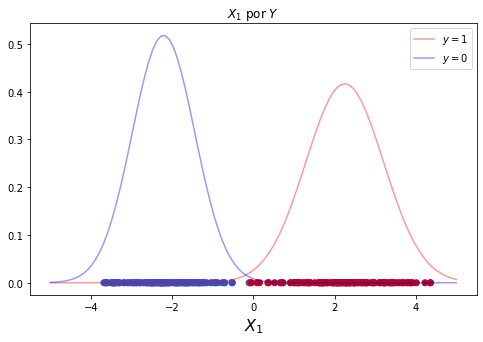

In [20]:
plots.new_plot(figsize=(8,5), title='$X_1$ por $Y$', labels=['$X_1$', None])
plots.Function(
    function=lambda X: [pdf_x_1_pos(x) for x in X], 
    X=(-5,5), 
    n_samples=100, color='red', label='$y = 1$', alpha=.4
)

plots.Function(
    function=lambda X: [pdf_x_1_neg(x) for x in X], 
    X=(-5,5), 
    n_samples=100, color='blue', label='$y = 0$', alpha=.4
)

plots.Scatter(X[:,0], Y=np.zeros(300), c=Y, cmap=plt.cm.coolwarm)

Nitidamete, ambas as distribuições não se sobrepõem na dimensão $X_1$, o que mostra que essa variável é de fato bastante informativa para separar as classes. Existem alguns pontos no máximo que são anômalos e tem boa probabilidade de pertencer a ambas as distribuições, especialmente com valores de $x_1 \approx 0$, porém no mais ambas as distribuições são totalmente distinguíveis. Agora aplica-se a mesma função para a variável $X_2$

In [21]:
pdf_x_2_pos = mfuncs.normal_prob_density(mean=X_pos[:,1].mean(), std=X_pos[:,1].std())
pdf_x_2_neg = mfuncs.normal_prob_density(mean=X_neg[:,1].mean(), std=X_neg[:,1].std())    


['set_xlabel', 'set_ylabel']
Call: ax_plot
Len Args 2
required 2 

Call: ax_plot
Len Args 2
required 2 

Call: ax_scatter
Len Args 2
required 2 



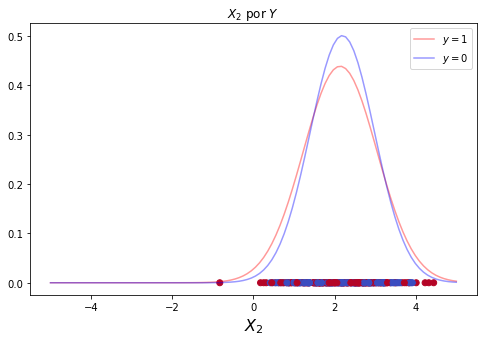

In [22]:
plots.new_plot(figsize=(8,5), title='$X_2$ por $Y$', labels=['$X_2$', None])
plots.Function(
    function=lambda X: [pdf_x_2_pos(x) for x in X], 
    X=(-5,5), n_samples=100, color='red', label='$y = 1$', alpha=.4
)

plots.Function(
    function=lambda X: [pdf_x_2_neg(x) for x in X], 
    X=(-5,5), n_samples=100, color='blue', label='$y = 0$', alpha=.4
)

plots.Scatter(X[:,1], Y=np.zeros(300), c=Y, cmap=plt.cm.coolwarm)

Aplicando a função de densidade probabilidade normal aos dados, fica mais nítido o papel de cada feature para distinguir entre as distribuições da classe 1 e da classe 0. Por exemplo, supondo que para uma nova observação:
 - Se $x_2 > 0$, isso não nos diz muita coisa, essa observação ainda tem grandes chances de ser tanto da classe positiva quando da classe negativa
 - Agora, se após isso, verificarmos que $x_1 < 0$, existe uma grande probabilidade que esse ponto seja pertencente a classe __negativa__, dado a distribuição da classe negativa observada para a variável $x_1$ 

De fato, podemos correlacionar essa distribuição com o z-score mencionado acima e computar a probabilidade de um determinado valor de $X_1$ pertencer a cada uma das distribuições com um rápido experimento: Supondo que uma nova observação foi feita, e a medição dessa observação de $x_1 = -0.5$ (e desconsiderando qualquer influência de outras variáveis como $X_2$ no caso), podemos estimar a probabilidade dessa nova observação pertencer a distribuição positiva e a distribuição negativa de $X_1$. Uma das aplicações do Z-score é justamente essa:

<img src='https://faculty.nps.edu/rbassett/_book/statsbook_files/figure-html/unnamed-chunk-294-1.png' width='400px'>

O z-score (no eixo horizontal do gráfico acima) como mencionado está quantificando a distância em unidades de desvio padrão de um determinado valor para o centro (média) da distribuição. Em probabilidade, aprende-se que a __área__ formada pela curva da distribuição representa a probabilidade dos eventos, e sua totalidade é naturalmente igual à 1.
Usando uma função de __densidade cumulativa__ (Cumulative density function) e passando como input o z-score do valor que temos, podemos calcular a probabilidade do valor desejado aparecer em cada uma das distribuições (positiva e negativa). Primeiro armazenamos os valores de $\mu$ e $\sigma$ de ambas as features para a distribuição de samples negativos:

In [23]:
# Cria um valor arbitrário de x_1 = 0
threshold = 0

# Seleciona registros da classe negativa
X_neg = X[np.where(Y == 0)]
X_pos = X[np.where(Y == 1)]

# Computa média e desvio padrão das distribuições X1 e X2 para os registros negativos
mean_neg, std_neg = X_neg[:,0].mean(), X_neg[:,0].std()
mean_pos, std_pos = X_pos[:,0].mean(), X_pos[:,0].std()

# Cria as funções para computar o z-score de um valor para ambas as distribuições (positiva e negativa)
z_score_neg = mfuncs.z_score(mean_neg, std_neg)
z_score_pos = mfuncs.z_score(mean_pos, std_pos)

Para testar se o z score está sendo computado corretamente, basta passar a média da distribuição e ver se retorna 0:

In [24]:
print('Z-score da média da distribuição negativa: %.2f' % z_score_neg(mean_neg))
print('Z-score da média da distribuição positiva: %.2f' % z_score_pos(mean_pos))

Z-score da média da distribuição negativa: 0.00
Z-score da média da distribuição positiva: 0.00


Agora com as funções, computamos o z-score de ambas as distribuições para $x_1 = 0$:

In [25]:
print('Z-score para distribuição de samples negativos: %.3f' % z_score_neg(threshold))
print('Z-score para distribuição de samples positivos: %.3f' % z_score_pos(threshold))

Z-score para distribuição de samples negativos: 2.876
Z-score para distribuição de samples positivos: -2.349


Ambos os z-scores apontam para um valor relativamente afastado da média de ambas as distribuições, é até um pouco mais próximo da distribuição positiva do que da negativa, mas ainda são próximos para inferir se é um valor muito mais provável de ocorrer em uma distribuição do que em outra. Em probabilidade, aprende-se que a __área__ formada pela curva da distribuição representa a probabilidade dos eventos, e sua totalidade é naturalmente igual à 1. Nisso é que entra a função de __densidade cumulativa__. A função (Cumulative density function) e passando como input o z-score do valor que temos, podemos calcular a probabilidade do valor desejado aparecer em cada uma das distribuições (positiva e negativa). Primeiro armazenamos os valores de $\mu$ e $\sigma$ de ambas as features para a distribuição de samples negativos:

$$\normalsize \Phi_{\mu, \sigma^2}(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{\left ( \frac{-(x - \mu)}{2\sigma} \right )^2} dx$$

A função de densidade cumulativa () por padrão retorna a probabilidade de um valor menor ou igual à um valor de $z$ aparecer naquela distribuição:

$$\normalsize \Phi_{\mu, \sigma^2}(x) = P \left (X \leq z_{x} \right )$$

Analogamente, podemos computar a probabilidade de ser maior do que $z_x$ subtraindo por 1 pois sabe-se que a soma das probabilidades deve ser igual à 1:

$$\normalsize P \left (X > z_{x} \right ) = 1 - \Phi_{\mu, \sigma^2}(x)$$

Ou seja, o que vamos testar aqui é qual a probabilidade de um valor de $x_1$ menor ou ingual à zero ocorrer em ambas as distribuições Vamos então computar a _cdf_ para o z-score de ambas as distribuições:

In [26]:
cdf_neg = mfuncs.normal_cumulative_density(mean_neg, std_neg)
cdf_pos = mfuncs.normal_cumulative_density(mean_pos, std_pos)

In [29]:
print('Probabilidade de X_1 <= 0 ocorrer na distribuição negativa: %.3f' % cdf_neg(threshold))
print('Probabilidade de X_1 <= 0 ocorrer na distribuição positiva: %.3f' % cdf_pos(threshold))

Probabilidade de X_1 <= 0 ocorrer na distribuição negativa: 0.998
Probabilidade de X_1 <= 0 ocorrer na distribuição positiva: 0.009


Ou seja, a probabilidade de um valor de $x \leq 0$ ocorrer entre observações da classe negativa é de __99%__, enquanto que para a classe positiva é de aproximadamente 1%, isso é totalmente visivel quando olhamos de novo a distribuição e respectivos valores de cada. Analogamente, um valor de $x_1 > 0$ tem 99% de chance de ocorrer na distribuição positiva, e menos de 0,2% de chance de ocorrer na distribuição negativa

In [31]:
print('Probabilidade de X_1 > 0 ocorrer na distribuição negativa: %.3f' % (1 - cdf_neg(threshold)))
print('Probabilidade de X_1 > 0 ocorrer na distribuição positiva: %.3f' % (1 - cdf_pos(threshold)))


Probabilidade de X_1 > 0 ocorrer na distribuição negativa: 0.002
Probabilidade de X_1 > 0 ocorrer na distribuição positiva: 0.991


<em>
    Criei funções simples e didáticas para computar as equações mostradas, mas é interessante também mostrar uma biblioteca bastante relevante de python para cálculos estatísticos para ser usado no dia a dia: o pacote <strong>SciPy</strong>, especialmente no módulo <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html'>scipy.stats.norm</a>. Observe que esse objeto possui um método <strong>scipy.stats.norm.pdf</strong> que computa justamente a densidade probabilidade:

In [32]:
from scipy.stats import norm

In [33]:
print('Função numpy para x=0: %.4f' % norm.pdf(-2, loc=mean_neg, scale=std_neg))
print('Função própria para x=0: %.4f' % mfuncs.normal_prob_density(mean_neg, std_neg)(-2))

Função numpy para x=0: 0.4984
Função própria para x=0: 0.4984


Além disso, ele também implementa a função de densidade cumulativa com o método <strong>scipy.stats.norm.cdf</strong>.</em>:

In [34]:
print('Função numpy para x=0: %.4f' % norm.cdf(z_score_neg(mean_neg), loc=mean_neg, scale=std_neg))
print('Função própria para x=0: %.4f' % mfuncs.normal_cumulative_density(mean_neg, std_neg)(z_score_neg(mean_neg)))

Função numpy para x=0: 0.9980
Função própria para x=0: 0.9980




#### 3.3.2 Implementando a função linear

Agora que cobrimos um pouco um leve bonus de estatística, voltamos para os classificadores lineares e a função linear. Um modelo linear foi treinado e retornou a seguinte função linear:

(2) $$\normalsize f(x) = 8.89 \cdot x_1 + 0.54 \cdot x_2 - 1$$

O coeficiente de $x_1$ (representado por $w_1$) é muito maior do que $w_2$, e expressa que, quanto maior for o valor de $x_1$, maior será a probabilidade de pertencer a classe positiva e isso se refletirá no output da função linear, que busca justamente outputs negativos para observações da classe negativa e vice versa. Abaixo é criado e exibido o vetor de coeficientes $w$ e o bias:

In [108]:
# Cria um numpy array contendo o vetor de coeficientes w
w = np.array([ 8.89, 0.54])
# Cria um escalar para representar o bias
bias = -1

# Exibe os vetores
ds.display_vec(w, label='w')
ds.display_vec([bias], label='b')

<br>$w = \begin{bmatrix}8.89\\0.54\end{bmatrix}$<br>

<br>$b = \begin{bmatrix}-1\end{bmatrix}$<br>

Cria uma função linear `linearFunc`que aplica o produto escalar de uma matriz de observações $X$ por um vetor de coeficientes $w$ e seguido pela soma do bias $b$

In [31]:
def linearFunc(X):
    # Retorna Y
    return np.dot(X,w) + bias

Agora, para refletir um pouco o que constatamos com as probabilidades das distribuições, criamos 3 vetores de input onde $x \in \mathbb{R}^2$ para testar a função linear e ver se esta se comporta de acordo. Repare que o valor de $x_1$ nos vetores a seguir é o que de fato determina a classificação final do mesmo, pois como vimos, $X_1$ é bem mais informativa, com duas distribuições bem distintas, e isso se refletiu em um coeficiente muito maior: 

In [109]:
# Cria uma matriz numpy
S = np.array([[-3,2],
              [0,2],
              [3,1]])
# exibe matriz
ds.display_matrix(S, label='S')

<br>$S = \begin{bmatrix}-3&2\\0&2\\3&1\end{bmatrix}$<br><br>

Dimensões da matriz: (3 x 2)



Aplicando o modelo aos 3 vetores de amostra, o modelo chegou aos seguintes valores:

Para o sample $S_1 = \begin{bmatrix}-3\\2\end{bmatrix}$:

$$\normalsize f(S_1) = (8.89 \cdot -3) + (0.54 \cdot 2) - 1 = -26.59$$

Para o sample $S_2 = \begin{bmatrix}0\\2\end{bmatrix}$:

$$\normalsize f(S_2) = (8.89 \cdot 0) + (0.54 \cdot 2) - 1 = 0.08$$

Para o sample $S_3 = \begin{bmatrix}3\\1\end{bmatrix}$

$$\normalsize f(S_3) = (8.89 \cdot 3) + (0.54 \cdot 1) - 1 = 26.21$$

Claramente o valor de $x_1$ determina a classificação final de $x$. Vimos que um valor de $x_1 \leq 0$ tem praticamente 100% de chances de pertencer a classe, e a função retorna isso. Outro ponto é que, quanto maior a propensão de um ponto ser pertencente a uma das classes, mais isso se refletirá não apenas no sinal do valor retornado, mas também se está próximo de zero ou não:

['set_xlabel', 'set_ylabel']
Full coords
Call: ax_scatter
Len Args 2
required 2 

Full coords
Call: ax_text
Len Args 2
required 2 

Call: ax_text
Len Args 2
required 2 

Call: ax_text
Len Args 2
required 2 

Full coords
Call: ax_scatter
Len Args 2
required 2 



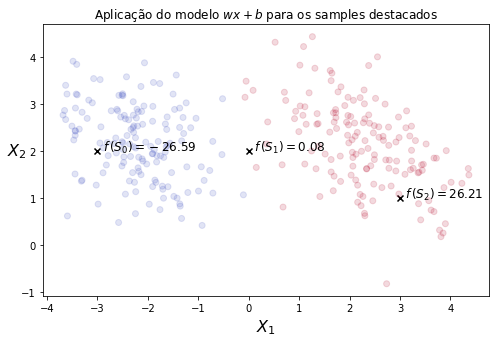

In [110]:
annot_sample = ['$f\,(S_%d) = %.2f$' % (i,z) for i,z in enumerate(np.dot(S,w) + bias)]

plots.new_plot(
    figsize=(8,5),
    labels = feature_label, 
    title = 'Aplicação do modelo $wx + b$ para os samples destacados'
)

plots.Scatter(S, annot=annot_sample, marker='x', color='black')
plots.Scatter(X, c=Y,  cmap=plt.cm.coolwarm, alpha=.15)

É perceptível que a função linear (quando ajustada), reflete perfeitamente o que constatamos com as probabilidades. Essa função busca assinalar valores negativos para inputs que ela considera negativos, positivos para os positivos, e valores teoricamente próximos de 0 para observações que estão próximas a fronteira entre as distribuições de ambas as classes. Após ajustado, o modelo linear atribuí um score bem menor do que zero para o sample $X_1$ na extremidade externa do grupo de observações da classe negativa (0). Analogamente, para o sample $X_3$ localizado na extremidade oposta da região onde se encontram as observações de classe positiva, o modelo atribuiu praticamente o mesmo valor que em $X_1$, porém positivo. Basicamente, o modelo linear tem a mesma confiança para determinar que $X_1$ pertence a classe 0 e que $X_3$ pertence a classe 1. Mas o mais interessante é a região da fronteira de decisão sendo confirmada através do sample $X_2$. Como era esperado, o modelo atribuiu um valor próximo a zero para esse ponto, pois ele está em uma região da feature space onde ambas as distribuições se encontram. É um cenário diferente das outras duas observações que estão nas extremidades opostas das suas classes, onde o modelo tem grande confiança para classificar. Sendo assim, para $X_2$ o modelo linear provavelmente atribuiu ele a classe positiva, mas a confiança dessa previsão é baixa.


### 3.4 Superfícies de Decisão


Um plot bastante popular em ML é a __superfície de decisão__. A ideia por trás do plot é simples: para cada coordenada de $x$, o modelo retorna um valor de $y$, então o plot consiste basicamente em aplicar o modelo a uma grade de valores de $x$ e visualizar. Quando essa visualização é feita, percebemos como o modelo está "mapeando" o feature space, ou mais precisamente, __separando__ a feature space. Entretanto, ao plotar essa superfície, a feature space não estará sub-dividida em dois espaços, mas sim uma superfície gradual:

Call: ax_contourf
Len Args 3
required 3 

Full coords
Call: ax_scatter
Len Args 2
required 2 



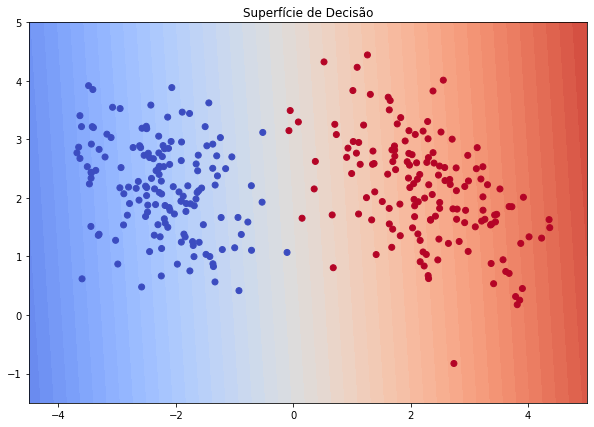

In [113]:
plots.new_plot(
    figsize=(10,7),
    lims = [(-4.5, 5), (-1.5, 5)],
    title='Superfície de Decisão',
)

plots.Surface(
    function=linear_func(w, bias), 
    min_val=-6, max_val=6, n_samples=4, 
    levels=70, cmap=plt.cm.coolwarm)

plots.Scatter(X, c=Y, cmap=plt.cm.coolwarm)


A fronteira de decisão gradual exibida acima vai de encontro com uma função linear que retorna valores contínuos e não propriamente uma classificação final, um rótulo. A parte final de um classificador linear envolve aplicar uma _nota de corte_.

### 3.5 Thresholding Function 

 Após explicar a relação entre as variáveis com um modelo paramétrico, classificadores lineares utilizam um limiar, uma espécie de nota de corte (do inglês, <em>threshold</em>), para classificar uma observação com base na confiança que o modelo linear retorna sobre ele. Diferentes classificadores podem usar diferentes funções de threshold para classificar um score do modelo linear, como será explorado nos próximos notebooks. O threshold será representado aqui pela letra $\tau$. O threshold $\tau$ é definido como 0 dado que o modelo linear foi ajustado com a premissa da classe positiva e negativa, e esse valor representa a fronteira de decisão dentro da feature space. Traduzindo isso para o exemplo deste notebook, a __função de decisão__ final desse classificador será:

(2) $$\normalsize f_{w,b}(x_i) = \left\{\begin{matrix} 1 \text{   se }\left \langle w, x \right \rangle + b\geq  0\\ 0 \text{   se } \left \langle w, x \right \rangle + b <  0 \end{matrix}\right.$$

Implementando essa função no python:

In [ ]:
def funcao_decisao(X):
    # Aplica a função linear
    z = np.dot(X,w) + bias
    # Retorna a classificação de cada valor de z usando o threshold = 0
    # 1 se x for maior ou igual a 0, senão 0
    return np.array([1 if x >= 0 else 0 for x in z])

Associa o método `Classifier.DecisionFunction` da instância `clf` á função criada acima

In [ ]:
clf.DecisionFunction = funcao_decisao

A função acima pode ser representada como uma função composta $\sigma (z)$ onde $z$ representa o score atribuído pela função linear, e $\sigma$ representa a função que aplica um thresholds a esse score gerado em $z$. Essa representação é especialmente útil para derivar essas funções através da __regra da cadeia__. Isso será visto em detalhes nos próximos notebooks que abordam a descida de gradiente, redes neurais e o algoritmo de backpropagation.

Voltando ao exemplo dos vetores de amostra, primeiro calcula-se a função linear, lembrando que esses valores já foram computados e armazenados na variável `Z`:
<br><br>
$$\normalsize z_i = \left \langle w, x_i \right \rangle + b$$

Exibindo o score linear aplicado a cada vetor $x_i$ do conjunto de teste em `sets_teste`:

In [ ]:
vs.display_vec(Z, label='Z_\\text{sample}')

Depois aplica-se o threshold, representado aqui por $\sigma$:

$$\normalsize \sigma \,(z_i) = \left\{\begin{matrix} 1 \text{   se }z_i\geq  0\\ 0 \text{   se }z_i <  0 \end{matrix}\right.$$

Aplicando o classificador aos dados da amostra de testes e exibindo o array final após aplicar o classificador com a função de threshold:

In [ ]:
vs.display_vec(clf.predict(S), label='\\sigma(Z_\\text{sample})')

Com esse classisficador instanciado com uma função de decisão adequada, é possível gerar as regiões de decisão mencionadas ao longo deste notebook:

In [ ]:
vs.plot_superficie_decisao(clf,X_2d, Y_2d, size=(7,5), print_acc=True)

Praticamente todos os conceitos abordados até o momento se confirmam com o plot acima: Como mencionado anteriormente, em tarefas de classificação binária, a tarefa do classificador é separar esse espaço em duas regiões de decisão, uma para a classe positiva, e o outro a classe negativa. Acima percebe-se que o objetivo foi cumprido, e o espaço vetorial composto por $X$ foi devidamente separado de forma que todas as observações da classe positiva estão na região de decisão da classe positiva, e vice-versa, de forma que o erro desse modelo para o conjunto de treino é igual a zero.

## 4. Subespaços e Noções Algébricas

Classificadores lineares separam o espaço vetorial de features utilizando uma generalização da reta para qualquer espaço $n$-dimensional, e esse objeto geométrico é chamado de __hiperplano__. Dado um espaço dimensional de features em $\mathbb{R}^n$, o hiperplano de separação é um subespaço de $n - 1$ dimensões definido por:

$$\normalsize H_w = \left \{ x \in \mathbb{R}^n \,\,\, | \,\,\, \left \langle w, x \right \rangle + b = \tau \right \}$$

Onde $\tau$ representa o threshold do modelo. Por padrão em classificadores lineares $\tau = 0$, mas aqui optamos por trabalhar com $\tau$ por ser conveniente para traçar o hiperplano para qualquer threshold arbitrário, não apenas onde $\left \langle w, x \right \rangle + b = 0$. Isso é útil por exemplo para traçar as margens do hiperplano de separação em SVMs.

<img src='https://i.stack.imgur.com/FdO0n.png' width='500px'>

No caso do classificadores lineares, o hiperplano de separação encontrado representa a fronteira de decisão do espaço vetorial das features, ou seja, a região do espaço vetorial onde o modelo linear retorna zero:

$$\normalsize  \left \langle w, x \right \rangle + b = 0$$

### 4.1  Vetor normal do hiperplano

Quando o algoritmo de otimização do classificador linear está ajustando e minimizando o erro, o que o algoritmo está diretamente encontrando é o vetor de coeficientes $w$ ótimo dado algum critério de erro. O hiperplano de separação é uma consequência direta de se aplicar um threshold ao modelo linear: na superfície de decisão gradual, a primeira exibida, o modelo consistia apenas em aplicar o vetor de coeficientes ao espaço vetorial das features, o que cria uma espécie de gradiente ao invés de superfícies de decisão. Apenas após aplicar a função de threshold a esse modelo linear, a fronteira de decisão se transformou no hiperplano, pois aí sim o espaço vetorial foi dividido em sub-regiões. Dessa forma, para criar uma equação que de fato descreva esse sub-espaço, é necessário primeiro entender a relação entre o hiperplano e o vetor $w$. O hiperplano funciona como uma nota de corte em um vetor de pesos linear de forma que esse subespaço será <a href='https://en.wikipedia.org/wiki/Orthogonality'>ortogonal</a> em relação ao vetor normal de coeficientes $w$. 


In [ ]:
Image('../input/imgsnotebooks/normal_vector.gif')

Abaixo é feito uma demonstração dessa relação entre um vetor de pesos e o hiperplano formado por ele. Para simplificar o exemplo, define-se que esse hiperplano passa pela origem desse espaço vetorial de forma que a equação que descreve o hiperplano tem coeficiente linear / bias e o threshold iguais à zero $b = 0\,\,;\,\,\tau = 0$:

$$\normalsize H = \left \{ p \in \mathbb{R}^3 \,\,|\,\, \left \langle \vec{n}, p \right \rangle = 0 \right \}$$



Onde $\vec{n}$ representa um vetor normal desse hiperplano (leia-se um vetor de coeficientes) e $p$ é um ponto $(x,y,z)$ nesse espaço. Considerando $p_0$ como um vetor nulo que representa a origem desse espaço, sabe-se que a origem encontra-se no hiperplano pois satisfaz a equação do hiperplano:

$$\normalsize \left \langle \vec{n}, p_0 \right \rangle = 0$$

Cria um vetor de pesos arbitrário e o vetor nulo representando a origem:

In [ ]:
# cria vetor normal
N = np.array([1.9,.7,3])

# cria vetor p0
P0 = np.zeros(3)

# exibe os vetores
vs.display_vec(N, '\\vec{n}')
vs.display_vec(P0, 'p_0')

Agora, considera-se um segundo ponto $p_1$

In [ ]:
# cria o vetor p1
P1 = np.array([3.5, -3, -(-0.63333*(-3.5) - 0.2333333*(3))])

# exibe vetor
vs.display_vec(P1, 'p_1')

Sabe-se que esse ponto também se encontra no hiperplano pois $\left \langle \vec{n}, p_i \right \rangle = 0$ da mesma forma como $\left \langle w, x_0 \right \rangle = 0$:

In [ ]:
print('Produto escalar entre os vetores: %.3f' % np.dot(P1, N))

Sendo assim, é possível igualar ambas as equações:

$$\normalsize \left \langle \vec{n}, p_0 \right \rangle = \left \langle \vec{n}, p_1 \right \rangle$$

$$\normalsize \left \langle \vec{n}, p_0 - p_1 \right \rangle = 0$$

Ou seja, a diferença entre os dois pontos é um vetor que também se encontra no hiperplano (e qualquer outro ponto entre eles também por consequência) e que também é perpendicular ao vetor normal, e o produto escalar entre eles será 0, o que significa que ambos também são __perpendiculares entre si__

In [ ]:
# computa o vetor de diferença
P_diff = P0 - P1

# exibe
vs.display_vec(P_diff, '(p_0 - p_1)')
print('Produto escalar entre vetores: %.3f' % np.dot(N, P_diff))

É possível ilustrar o exemplo acima plotando o hiperplano e vetores para visualizar o ângulo de 90º entre eles.

<em>NOTA: A equação que desenha o hiperplano é explorada em 3.2</em>

In [ ]:
# Cria uma função 
H = mf.hyperplane_function(N)

# Define coordenadas para plotar a superfície do hiperplano
x_coord, y_coord = np.meshgrid(*[np.linspace(-5,5,3) for i in range(2)])

# Cria uma matriz de valores para aplicar a função do hiperplano e encontrar a última dimensão
grid_xy = np.c_[x_coord.flatten(), y_coord.flatten()]

# Consolida o grid completo de coordenadas
coords = [x_coord, y_coord, H(grid_xy).reshape(x_coord.shape)]
    
# Outras especificações necessárias para gerar o plot
lims = [(-5,5) for i in range(3)]
labels = ['$\\vec{n}$', '$(p_0 - p_1)$']
vecs = [N, P_diff]

# visualizando plano e vetores
ax = vs.plot_vecs_3d(vecs, return_ax_obj=True, ax_lims=lims, labels=labels, size=(10,10), label_offset=.1, ax_offset=3 )
ax = vs.plot_plane(*coords, ax_obj=ax, alpha=.3, elev=0, azim=90, return_ax_obj=True)
t = ax.text(0,0,0.1 +.09,'$p_0$', fontsize=12)

### 4.2 Ângulo entre vetores

É perceptível acima que o ângulo formado entre o vetor normal $\vec{n}$ e o hiperplano ou qualquer ponto pertencente a ele é de 90°, mas nem sempre ele será visualmente perpendicular por questões de distorções no plot e eixos em escalas diferentes. Matemáticamente, o produto escalar entre o vetor normal $\vec{n}$ e um vetor resultante $p_0 - p_i$ qualquer sendo igual a zero é o que nos indica que o ângulo entre os vetores é de fato 90º. O produto escalar, ou produto interno de um vetor é na realidade uma medida que relaciona a magnitude dos vetores com o __ângulo__ formado entre eles, e pode ser reescrito de maneira alternativa como:

$$\normalsize \left \langle w,x \right \rangle = \left \| w \right \| \left \| x \right \| \,\text{cos}(\theta)$$

Onde $\text{cos}$ é o __cosseno__ de $\theta$, que representa justamente o ângulo entre os vetores:

In [ ]:
Image('../input/imgsnotebooks/angle_bare.png', width=300)

Podemos por exemplo trabalhar a equação isolando $\theta$ de forma a retornar o ângulo entre dois vetores a partir do produto escalar entre eles:

(1) $$\normalsize \left \langle w,x \right \rangle = \left \| w \right \| \left \| x \right \| \,\text{cos}(\theta)$$

(2) $$\normalsize \text{cos}(\theta) = \frac{\left \langle w,x \right \rangle}{\left \| w \right \| \left \| x \right \|}$$

(3) $$\normalsize \theta= \text{arccos} \left (\frac{\left \langle w,x \right \rangle}{\left \| w \right \| \left \| x \right \|} \right )$$

No exemplo do vetor normal, sabemos que qualquer vetor presente no hiperplano é perpendicular ao vetor normal pois o produto escalar entre os vetores é zero, sendo assim:

$$\normalsize \theta_{n, p} = \text{arccos} \left (\frac{0}{\left \| w \right \| \left \| x \right \|} \right ) = \text{arccos}(0) \approx 1.5708$$

O __arco cosseno__ de 0 é aproximadamente $1.5707$ radianos, que, quando convertido para graus, é precisamente 90 graus, ou seja, quando dois vetores forem perpendiculares entre si, seu produto escalar deve ser 0. Aplicando a função para os vetores descritos acima, chegamos exatamente nos 90 graus esperados:

In [ ]:
print('Produto escalar entre os vetores: %.3f' % np.dot(N, P_diff))
print('Ângulo entre os vetores em radianos: %.4f' % mf.get_angle(N, P_diff))
print('Ângulo entre os vetores em graus: %d°' % mf.get_angle(N, P_diff, return_degrees=True))

É possível demonstrar as equações acima da mesma forma com o dataset sintético criado. Abaixo a superfície de decisão do classificador é exibida em conjunto com o vetor de coeficientes $w$ e o seu produto escalar e respectivo ângulo com cada um dos vetores de teste criados anteriormente. Além disso, plota-se o vetor de coeficientes com uma norma reduzida ($\left \| w \right \| = 2.5$ no caso), uma vez que o vetor de coeficientes original possuí uma norma alta de forma que ao plotá-lo na superfície abaixo, ele se distancia muito das observações de $X$ e distorce o plot:

In [ ]:
# Os rótulos dos vetores são o produto escalar destes com o vetor de pesos
dot_prods = ['$\\left \\langle w,x \\right \\rangle =  %.1f$' % dot_prod for dot_prod in np.dot(S, w)]

# Exibe os vetores de teste
ax = vs.plot_vecs_2d(
    S,
    labels=dot_prods,
    label_offset=0.1,
    ax_lims=[(-4,5) ,(-1,3)], 
    return_ax_obj=True,
    width=.004,
)

# Redimensiona a norma de W, ||W|| = 2.5
w_rescaled = mf.unit_vec(w, l=2.5)
# exibe o vetor de coeficientes 
ax.quiver(0, 0, w_rescaled[0], w_rescaled[1], angles='xy', scale_units='xy', scale=1, width=.004, color='red')
# anota o vetor
ax.text(w_rescaled[0], w_rescaled[1], '$\\vec{w}$', fontsize=14, color='red')

# anota o valor atribuído pelo modelo para cada sample, bem como ângulo
for x_sample in S:
    # Computa o ângulo theta entre o sample e o vetor de coeficientes
    angle =  mf.get_angle(w, x_sample, return_degrees=True)
    # anota os valores no plot
    ax.text(x_sample[0] + .1, x_sample[1] + 0.15, '$\\theta \\approx  %.d$°' % int(angle), fontsize=14)

# finaliza exibindo a grade    
ax.grid()

Os valores para o sample do meio são interessantes. O dot product é igual á $1.1$, bem próximo a zero, o que se demonstra na sua proximidade á fronteira de decisão e também demonstra seu ângulo em relação a $w$ como 87°, quase perpendicular. O funcionamento dos classificadores lineares fica mais intuitivo quando interpretado pelos ângulos. O vetor de pesos está apontando sempre pra região positiva do feature space, ou seja, a região onde o produto escalar com esse vetor é maior ou igual a zero, ou em termos de ângulo, o ângulo entre esse ponto e o vetor de pesos é de no máximo 90°, enquanto que ângulos maiores do que isso demonstram que o vetor em questão está apontado para o sentido oposto da região positiva, e portanto a classe daquele vetor deve ser negativa.

### 4.3 Norma de um vetor 

No tópico anterior, muitas vezes foi mencionado o termo <em>"norma do vetor"</em>, inclusive na equação alternativa do produto escalar percebe-se que a norma de um vetor $\vec{v}$ é simbolizada como $\left \| \vec{v} \right \|$. A norma de um vetor nada mais é do que seu sua magnitude. No caso da física (onde calculos vetoriais são basicamente rotina), o comprimento do vetor costuma representar a intensidade de uma força, enquanto que o vetor em si representa a direção da propagação dessa força. Já no caso de aprendizado de máquina e ciência de dados, existem muitas aplicações diferentes para norma de um determinado vetor, por exemplo:

- medida de distância em algoritmos de clusterização
- critério de parada em algoritmos de otimização 
- regularização de modelos prevenindo overfitting

Um exemplo é a função própria `unit_vec` que foi usada no plot acima para redimensionar o comprimento de $w$ para que esse coubesse no plot sem distorcê-lo. Vetores com a norma igual á 1 são os famosos __vetores unitários__ (unit vectors), $\left \| \vec{v} \right \| = 1$, que podem ser encontrados simplesmente dividindo um vetor pela sua norma original. E se quisermos uma norma arbitrária (como no plot acima que especificamos 2.5 de norma), basta multiplicar o vetor unitário por um escalar:

$$\normalsize v_\text{scale} = \lambda \left ( \frac{v}{\left \| v \right \|} \right )$$

Onde $\lambda$ funciona como uma espécie de __autovalor__ do vetor $v$ (esse conceito está fortemente relacionado a <em>eigendecomposition</em> vista em algoritmos de redução de dimensionalidade por exemplo). É sempre importante resaltar que a conta acima altera __apenas__ a norma do vetor, nunca a sua direção. Observe o exemplo abaixo:


In [ ]:
# cria um vetor de base
vec_base = np.array([3,2])
# Cria variações desse vetor com ||v|| = 1 e 2
vec_custom_norm = [mf.unit_vec(vec_base, l=i) for i in [1, 2]]
# armazena os vetores em uma matriz
vecs_plot = np.vstack([vec_base, vec_custom_norm])
# exibe a matriz de vetores
vs.display_matrix(vecs_plot)

# exibe no plot
labels = ['$||v|| = %.2f$' % np.linalg.norm(v) for v in vecs_plot]
vs.plot_vecs_2d(vecs_plot, ax_lims=[(0,4),(0,3)], labels=labels, label_offset=-.15, ax_offset=1)

#### 4.3.1 L1-norm

A equação abaixo descreve a norma p (de <em>p-norm</em>), que é a maneira mais comum de se computar a norma de um vetor, onde, para cada valor de $p$, estamos computando um tipo de norma diferente. No caso da documentação do numpy, $p$ é anâlogo ao argumento `ord`:

$$\normalsize \left \| v \right \|_p = \left (\sum_{i}^{n} |v_i|^p \right )^{\frac{1}{p}}$$

Em geral as normas com $p=1$ e $p=2$ são as mais utilizadas e mencionadas. Quando $p=1$, estamos calculando a __L1-norm__, que é cálculo mais simples da norma. Substituindo $p$ por $1$, a equação geral acima fica bem simples: 

$$\normalsize \left \| v \right \|_1 = \sum_{i}^{n} |v_i| = |v_1| + |v_2| \cdots |v_n|$$

Onde $|v_n|$ é simplesmente o valor absoluto do componente $n$ do vetor $v$. Uma maneira de computar a norma L1 é a seguinte: 


In [ ]:
L1_norm = lambda vec: sum(abs(vec))

Comparando com a implementação do numpy (observe que o argumento `ord` é definido como 1 para calcular a norma L1)

In [ ]:
print('np.linalg.norm: %.4f ' % np.linalg.norm(np.array([2,2]), ord=1))
print('Função L1_norm: %.4f ' % L1_norm(np.array([2,2])))

#### 4.3.2 L2-Norm

Já quando $p$ assume o valor de 2, estamos computando a norma padrão e mais intuitiva que tem, a __L2-Norm__, que assume a equação abaixo:

$$\normalsize \left \| v \right \|_2 = \left (\sum_{i}^{n} |v_i|^2 \right )^{\frac{1}{2}} = \sqrt{\sum_{i}^{n} v_i^2 } = \sqrt{v_1^2 + v_2^2 \cdots v_n^2}$$

Uma maneira direta de se computar a norma L2 é aplicando a raíz quadrada ao dot produto entre o vetor e si mesmo na transpósta:

In [ ]:
L2_norm = lambda vec: (np.dot(vec, vec.T))**(1/2)

Novamente, comparando com a implementação do numpy. Nesse caso não é necessário passar o argumento `ord` pois por padrão a norma L2 é computada com essa função, mas passaremos o argumento para deixar explícito:

In [ ]:
print('np.linalg.norm: %.4f ' % np.linalg.norm(np.array([2,2]), ord=2))
print('Função L2_norm: %.4f ' % L2_norm(np.array([2,2])))

### 4.4 Medidas de distância vetorial

As normas de vetor estão em essencia descrevendo a __distância__ entre dois pontos (sendo um deles a origem). A primeira coisa a se considerar é que qualquer vetor pertencente a um determinado espaço vetorial e pode ser escrito como a combinação dos vetores __base__ desse espaço vetorial. A base nada mais é do que o conjunto de vetores linearmente independentes que projetam o espaço vetorial. Por padrão são vetores unitários que formam os eixos do espaço vetorial, ou seja, se o espaço vetorial é tri-dimensional, existem 3 vetores base, e assim por diante. Para os casos mais comuns ($\mathbb{R}^2$ e $\mathbb{R}^3$) costumasse chamar os vetores que constituem a base desses espaços como $i,j,k$ ou $e_1, e_2, e_3$. Ao ordenar os vetores base como vetores coluna de uma matriz, forma-se uma matriz identidade:

$$\normalsize \begin{bmatrix}e_1&e_2&e_3\end{bmatrix} = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$$ 

Agora, supondo que exista um vetor arbitrário em $\mathbb{R}^2$ para simplificar:

$$\normalsize \vec{v} = \begin{bmatrix}2\\2\end{bmatrix}$$

Como mencionado, o vetor pode ser reescrito como a combinação dos vetores base:

(1) $$\normalsize \vec{v} = x \, e_1 + y \, e_2$$

(2) $$\normalsize \vec{v} = x \begin{bmatrix}1\\0\end{bmatrix} + y \begin{bmatrix}0\\1\end{bmatrix}$$

(3) $$\normalsize \vec{v} = \begin{bmatrix}x\\0\end{bmatrix} + \begin{bmatrix}0\\y\end{bmatrix} = \begin{bmatrix}x + 0\\0 + y\end{bmatrix} = \begin{bmatrix}x\\y\end{bmatrix}$$

Para o vetor descrito acima, já sabe-se que $x = 2$ e $y = 2$. Ou seja, os componentes de $\vec{v}$ são essencialmente os vetores base do espaço vetorial multiplicados por um coeficiente que representa a magnitude do componente. É exatamente como a ilustração abaixo:


In [ ]:
Image('../input/imgsnotebooks/normas_vetores.png', width=400)

Os vetores em vermelho são os vetores base do espaço $\mathbb{R}^2$. Os componentes que definem o vetor $\vec{v}$ são como mencionado, a combinação dos vetores base do espaço multiplicados pelos coeficientes $x,y$, sendo um por componente / dimensão. A magnitude do vetor também pode ser encarada como a __distância__ entre dois pontos (sendo um deles a origem). Em L1-norm, a magnitude do vetor essencialmente é descrita como a quantidade de vetores bases necessários para compor o vetor final, que no final, será basicamente somar os valores absolutos de $x$ e $y$. Esse cálculo também é chamado de __distância manhattan__ pois (com um pouco de esforço mental) esse cálculo acaba transformando o espaço vetorial em uma grade quadricular de vetores base e depois computando a menor quantidade de "quarteirões" necessárias para se transitar de um ponto ao outro.



In [ ]:
Image('../input/imgsnotebooks/manhattan_dist.png', width=200)

Já a norma L2-Norm é muito mais intuitiva do que a L1-Norm, ao menos quando tratamos da distância entre os pontos. Na escola aprendemos um teorema extremamente simples e conhecido chamado de __Teorema de Pitágoras__:

<img src='http://www.brasilescola.com/upload/e/Untitled-25(1).jpg'>

Onde a hipotenusa $a$ é calculada com a famosa equação:

$$\normalsize a^2 = b^2 + c^2$$

Observando de novo a imagem do vetor acima, fica nítido que a hipotenusa no teorema é precisamente a norma do vetor através dos catetos (leia-se componentes do vetor descritos por $x,y$), e substituindo os valores dos vetores no teorema de pitágoras, e essa distância é chamada de __distância euclidiana__, que é a medida de distância vetorial padrão para inúmeros algoritmos supervisionados e não supervisionados (em especial clustering):

$$\normalsize \left \| v \right \|_2^2 = x^2 + y^2$$

Trabalhando a equação para remover o expoente de $\vec{v}$ e substituindo $x,y$ pelos componentes $v_1$ e $v_2$, chegamos exatamente na fórmula da L2-norm:

$$\normalsize \left \| v \right \|_2 = \sqrt{v_1^2 + v_2^2}$$

Que pode ser expresso como a distância euclidiana entre os pontos $u = (0,0)$ e $p = (2,2)$:

(1) $$\normalsize d(u,p) = \sqrt{(u_1 - p_1)^2 + (u_2 - p_2)^2}$$

(2) $$\normalsize d(u,p) = \sqrt{(0-2)^2 + (0-2)^2}$$

(3) $$\normalsize d(u,p) = \sqrt{8} \approx 2.8284$$

## 5. Equação do Hiperplano 

Muitas vezes no contexto de aprendizagem de máquina, pode ser interessante visualizar o hiperplano de separação encontrado pelo algoritmo (óbviamente para os casos $\mathbb{R}^2$ e $\mathbb{R}^3$). O hiperplano nada mais é do que um subespaço $(n-1)$-dimensional plano separando um espaço $n$-dimensional e sendo assim, a equação do hiperplano deve assumir a forma da __equação reduzida da reta__, que na realidade, já é a equação que está sendo abordada desde o início:

$$\normalsize y = wx + b$$

Seguindo esse racional, precisamos adaptar a equação do hiperplano à equação reduzida da reta mostrada acima. Basicamente, isóla-se a última dimensão da equação, $x_n$, e a trata como $y$. Dessa forma, $y$ será um plano projetado pelas $n-1$ primeiras dimensões, desenhando assim o subespaço mencionado.

$$\normalsize  \left \langle w,x \right \rangle + b = \tau  \rightarrow  y = wx + b$$

Lembrando novamente que $\tau$ é o threshold de classificação, que por padrão é 0.

### 5.1 Visualizando o Hiperplano em $\mathbb{R}^2$

No caso onde $\left \{ x, w \in \mathbb{R}^2\right \}$, $H$ geométricamente será uma reta, um plano unidimensional:

In [ ]:
Image('../input/imgsnotebooks/grafico_hiperplano.png')

Para dados bidimensionais, a equação que satisfaz o hiperplano, possuí duas variáveis ($x_1, x_2$). Seguindo o descrito acima, isola-se a dimensão $x_2$ como $y$ na equação de uma reta unidimensional. A dimensão restante $x_1$ será a variável "independente" de $x_2$:

(1) $$\normalsize  w_1x_1 + w_2x_2 + b = \tau$$

(2) $$\normalsize  w_1x_1 + w_2x_2 = \tau - b$$

(3) $$\normalsize  x_2 = \frac{\tau - b - w_1x_1}{w_2}$$

Reescrevendo de acordo com a equação reduzida da reta:

$$\normalsize  x_2 = -\frac{w_1}{w_2}x_1 + \frac{\tau - b}{w_2}$$

Onde o coeficiente angular da linha que descreve o hiperplano é $w = \frac{- w_1}{w_2}$, o coeficiente linear $b = \frac{\tau - b}{w_2}$ e $x_1$ como mencionado passa a ser a variável independente dessa reta, descrevendo assim um subespaço linear em $(2 - 1)$ dimensões. Com essa equação, basta aplicá-la a uma grade de valores de $x_1$ para desenhar o hiperplano:




In [ ]:
Image('../input/imgsnotebooks/equacao_hiperplano.png', width=350)

A função que descreve o hiperplano é então uma linha. E equação final que desenha o hiperplano encontrado anteriormente e levando em consideração que $\tau = 0$ fica assim:

$$\normalsize x_2 = \frac{-8.89}{0.54}x_1 - \frac{(0-1)}{0.54}  = -16.46x_1 + 1.85$$

Construindo a função anônima `H` que recebe valores de $x_1$ e desenha o hiperplano:

In [ ]:
H = lambda X: np.array([-16.46*x[0] + 1.85 for x in X])

Agora basta aplicar a função gerada acima para encontrar os valores de $x_2$ no espaço de $x_1$ que satisfazem a equação do hiperplano e criar uma visualização dos dados e o hiperplano encontrado. Primeiro cria uma grade de valores de $x_1$:


In [ ]:
# Cria uma grade de valores x_1 para aplicar a função
grade_x1 = np.expand_dims(np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max()), axis=-1)

# exibe o vetor
vs.display_matrix(grade_x1, n_rows=5, label='x_1')

Aplica a função `H`e encontra os respectivos valores de $x_2$ que junto com $x_1$ satisfazem a equação do hiperplano:

In [ ]:
# computa os respectivos valores de x_2
grade_x2 = H(grade_x1)

# exibe o vetor
vs.display_vec(grade_x2[:5], label='x_2')

tomando o primeiro vetor encontrado como exemplo, é possível confirmar que ele se encontra no hiperplano aplicando a equação:

In [ ]:
# Cria um vetor encontrado pela função acima para testar a equação do hiperplano
vec_teste = np.array([grade_x1[0][0], grade_x2[0]])

# exibe vetor de teste
vs.display_vec(vec_teste)

# exibe resultado arredondado do produto escalar entre o vetor teste e o vetor de coeficientes
print('Dot product: %d' % round(np.dot(vec_teste, np.array([8.89, 0.54])) - 1))

O produto escalar entre o vetor encontrado pela função e o vetor de coeficientes do hiperplano é igual a zero, o que significa dizer que este vetor __satisfaz__ a equação do hiperplano e portanto se encontra no mesmo. Seguindo, abaixo é gerada a visualização dos vetores encontrados acima. Percebe-se que essa função desenhou corretamente o hiperplano de separação do modelo 

In [ ]:
# Gráfico de dispersão
ax = vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d, alpha=.4, size=(7,5), title='Hiperplano desenhado com $x_2 = -16.46x_1 + 1.85$', return_ax_obj=True)

# Função que desenha o hiperplano
ax.plot(grade_x1, grade_x2, color='green', linewidth=1, linestyle='--', label='$\\left \\langle w, x \\right \\rangle + b = 0$')

# demais personalizações do plot
ax.legend()
lim = ax.set_ylim(X_2d[:, 1].min() - .5, X_2d[:, 1].max() + .5)

$\tau$ como mencionado é útil na equação para permitir desenhar o hiperplano em outras regiões além da fronteira de decisão. Com a função criada, é possível desenhar as regiões de decisão aos quais os 3 vetores de teste do início deste notebook se encontram. O score linear atribuído a cada um daqueles vetores novamente:

In [ ]:
vs.display_vec(Z)

Adaptando a função para permitir um valor arbitrário para $\tau$:

In [ ]:
H = lambda X, tau: np.array([-16.46*x[0] + (tau + 1) / 0.54 for x in X])

Abaixo são plotados esses 3 hiperplanos arbitrários. Observe que alterar o valor do threshold não afeta o coeficiente angular do hiperplano. O threshold se comporta como o coeficiente linear do hiperplano. Isso fica até evidente se observarda a equação que desenha o hiperplano, onde tanto o threshold $\tau$ quanto o bias do modelo fazem parte do termo que representa o coeficiente linear do hiperplano

In [ ]:
# Scatter plot dos vetores
ax = vs.scatter_plot(S[:, 0], S[:, 1], size=(11,8), return_ax_obj=True, marker='X', color='black')
ax = vs.scatter_plot(X_2d[:, 0], X_2d[:, 1], c=Y_2d, ax_obj=ax, alpha=.2, return_ax_obj=True, marker='o')

# Desenha o hiperplano para os 3 valores de threshold 
for tau, color in zip(Z, ['blue', 'green', 'red']):
    ax.plot(grade_x1, H(grade_x1, tau), color=color, linewidth=1, linestyle='--', label='$\\tau = %.2f$' % tau)
    
# anota o valor atribuído pelo modelo para cada sample
for x_sample, z in zip(S, Z):
    ax.text(x_sample[0] + .09, x_sample[1], '$\\left \\langle w, x \\right \\rangle + b = %.2f$' % z, fontsize=12)

# demais definições do gráfico    
ax.set_ylim(-1, 5)
ax.set_xlim(-5, 5)
ax.legend()
plt.show()

### 5.2 Visualizando o Hiperplano em $\mathbb{R}^3$

Aplicando a mesma lógica do hiperplano unidimensional, o hiperplano em um espaço vetorial $\mathbb{R}^3$ será um plano bidimensional representado pela equação $y = w_1x_1 + w_2x_2 + b$. A mesma abordagem é utilizada aqui, de resolver a última dimensão ($x_3$ no caso) de forma que satisfaça $\left \langle w, x \right \rangle + b = \tau$:

(1) $$\normalsize  w_1x_1 + w_2x_2 + w_3x_3 + b = \tau$$

(3) $$\normalsize  x_3 = \frac{\tau - b - w_1x_1 - w_2x_2}{w_3}$$

(4) $$\normalsize  x_3 = -\frac{w_1}{w_3}x_1 -\frac{w_2}{w_3}x_2 +  \frac{\tau - b}{w_3}$$

Nessa parte exibe-se um hiperplano em um espaço tri-dimensional de features. A equação que descreve o hiperplano nesse espaço é a descrita em (__inserir número atualizado da equação__). Para construir esse exemplo, são necessários dados tri-dimensionais, de preferência linearmente separáveis, e com um modelo linear ajustado. Cria um conjunto de dados sintéticos: 





In [ ]:
x_3d, y_3d = datasets_notebooks.Load_dataset_R3()

A matriz de samples $X$ agora é composta por vetores tridimensionais $\left \{ x \in \mathbb{R}^3 \right \}$ de forma que cada sample é um vetor com três componentes:

In [ ]:
vs.display_matrix(x_3d, n_rows=5, label='X')

Para visualizar dados tridimensionais, a função `scatter_plot` criada no começo desde notebook já não funciona mais pois foi feita pensando em dados bidimensionais. A função `scatter_plot_3d` foi adaptada para gerar um plot tridimensional de coordenadas $(x,y,z)$. Gerando a visualização dos dados:

In [ ]:
vs.scatter_plot_3d(x_3d, y_3d, elev=5, azim=30)

Os dados acima são visivelmente linearmente separáveis com um hiperplano bidimensional, perfeitos para a visualização. Para ajustar um modelo linear a esse dataset, utiliza-se aqui o classificador `SGDClassifier` do `sklearn`: 


In [ ]:
from sklearn.linear_model import SGDClassifier

O objeto importado implementa o algoritmo de Stochastic Gradient Descent ,(<em>descida de gradiente estocástica</em> no portugues). Esse algoritmo se tornou um dos otimizadores mais populares no mercado hoje em dia pela sua velocidade e matemática relativamente simples em comparação a outras classes de algoritmos de otimização, além de ser capaz de encontrar soluções satisfatórias para problemas de ciência de dados. Abaixo uma instancia desse objeto é criada: 




In [ ]:
clf = SGDClassifier(
        loss='perceptron',
        max_iter=500,
        verbose=True,
        tol=1e-5,
        random_state=2
    )

 Será explorado nos próximos notebooks tanto o algoritmo de otimização em si, quanto diferentes classificadores que podem ser treinados com esse otimizador, tais como o __perceptron__, que na prática muito de sua matemática já está sendo introduzida aqui por ser um classificador linear simples, e que serve como o uma "porta de entrada" para o extenso mundo das redes neurais artificiais que também serão detalhadas e codificadas mais a frente. Quatro parâmetros do algoritmo foram configurados, porém o que esses parâmetros representam será discutido em detalhes nos próximos notebooks onde é implementado o algoritmo do Stochastic Grandient Descent em python puro com auxilio de pacotes como o numpy.

O parâmetro `loss` já é interessante ser introduzido aqui, pois este determina qual tipo de __função de custo__ será utilizada para contabilizar o erro durante o treinamento. Usualmente, diferentes funções de custo estão associadas a um ou mais classificadores existentes. No caso do objeto acima, ele suporta funções de custo utilizadas por classificadores lineares diferentes, por exemplo:

- Função de custo <em>hinge</em> representa um Linear SVM
- A função <em>perceptron</em> é uma hinge modificada que representa justamente o perceptron
- Já <em>Log</em> é uma função logistica que representa regressões logísticas

Seguindo, treina-se classificador através da função `fit` passando como argumentos posicionais obrigatórios a matrix $X$ de samples de treino e o vetor $Y$ contendo as respectivas respostas para cada sample. Essa nomeclatura será padrão em algoritmos de ML de frameworks de mercado. 

Executando o treinamento:


In [ ]:
clf.fit(x_3d, y_3d)

O parmâmetro `verbose` passado como verdadeiro na instancia de `clf` permite acompanhar as interações do algoritmo de treino e o erro a cada interação. O algoritmo convergiu para um mínimo e encontrou um hiperplano que separa perfeitamente os dados visto que o custo representado por `loss` foi reduzido a zero a partir da segunda interação, o que significa que o hiperplano encontrado de fato separa perfeitamente ambas as classes. Os atributos `coef_` e `intercept_` do classificador armazenam os coeficientes $w$ e o bias $b$ encontrados para o modelo:

In [ ]:
w = clf.coef_.reshape(-1)
b = clf.intercept_

Visualizando os coeficientes do modelo

In [ ]:
vs.display_vec(w, 'w')
vs.display_vec(b, 'b')

Com base nesses coeficientes e na equação generalizada do hiperplano, a função que desenha o hiperplano bi-dimensional encontrado é:

$$\normalsize x_3 = 0.036 x_1 - 0.015 x_2 + 0.45$$

Criando a função para desenhar o hiperplano 

In [ ]:
H = lambda X: np.array([0.036*x[0] - 0.015*x[1] + 0.45 for x in X])

O plot tridimensional é mais elaborado que o bidimensional. Para visualizar o hiperplano e os dados em um espaço tridimensional, é necessário algumas linhas a mais de código. No caso bidimensional, desenhar o hiperplano siginifica encontrar para cada valor de $x_1$, o valor correspondente de $x_2$ que satisfaz $\left \langle w, x \right \rangle + b = 0$. Já no caso tridimensional, é preciso desenhar uma __grade__ de valores $(x_1, x_2)$, e depois para cada ponto dessa grade, descobrir o respectivo valor de $x_3$ que satisfaz a equação do hiperplano. Abaixo é criada uma maneira bem direta de se gerar esse tipo de plot, tanto que essa solução pode ser encontrada em diversos posts no stackoverflow por exemplo. 

Primeiro cria-se um array de valores para os eixos $x$ e $y$ que são representados pelas variáveis $x_1$ e $x_2$ respectivamente (esses eixos representam comprimento e largura no espaço tridimensional). Como a matriz $X$ foi normalizada com a fórmula de MinMaxScale, todos os valores dispostos nela estão convenientemente entre 0 e 1, então podemos nos basear nestes valores como mínimo e máximo para gerar a grade de valores. A função <a href='https://numpy.org/devdocs/reference/generated/numpy.linspace.html'>np.linspace</a> é bastante útil para gerar esse array:

In [ ]:
# Gerando o array de valores
vals = np.linspace(0, 1, 5)

# Visualizando
vs.display_vec(vals)

Usando esse array como referência, é possível criar o grid de valores. Para isso, a função <a href='https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html'>np.meshgrid</a> é ideal e igualmente popular, construindo para cada array passado, uma matriz com os respectivos valores daquela variável em um grid.

Abaixo são geradas as coordenadas de $x$ e $y$
    

In [ ]:
# Cria uma grade de valores usando np.meshgrid
X_coord, Y_coord = np.meshgrid(vals, vals)

# Exibe as grades
vs.display_matrix(X_coord, label='x_{\\text{coord}}')
vs.display_matrix(Y_coord, label='y_{\\text{coord}}')

Utilizando em conjunto a função <a href='https://numpy.org/doc/stable/reference/generated/numpy.c_.html'>numpy.c_</a> e o método <a href='https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html'>numpy.ndarray.ravel</a>, as matrizes acima são transformadas em um dataset no formato `n_samples` x `n_features` de valores $(x,y)$ compatível com a função do hiperplano. No caso, existem 25 linhas pois como existem 5 valores para $x$ e para $y$ ao todo existem $5^2$ combinações de valores. Exibindo apenas as 10 primeiras linhas:

In [ ]:
# Cria uma matriz com vetores linha para aplicar a função H
grid_xy = np.c_[X_coord.ravel(), Y_coord.ravel()]

# Exibe a matriz
vs.display_matrix(grid_xy, n_rows=10)

Passando a grade de valores $(x,y)$ na equação do hiperplano e redimensionando-a para combinar com as coordenadas nos demais eixos, gera-se os respectivos valores da coordenada $z$ (leia-se os valores de $x_3$ que satisfazem o hiperplano) que representa a informação de __altura__ em um plot tridimensional: 

In [ ]:
# Gera a terceira coordenada
Z_coord = H(grid_xy).reshape(X_coord.shape)

# Visualiza a matriz
vs.display_matrix(Z_coord, label='z_{\\text{coord}}')

Com as matrizes de coordenadas dos três eixos do plot, é possível gerar a visualização. Primeiro são plotados os samples de treino no espaço de features $\mathbb{R}^3$. Em seguida, para plotar o hiperplano a função <a href='https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=plot_surface#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface'>Axes3D.plot_surface</a> é bastante útil de direta. Ela recebe as matrizes de coordenadas dos eixos $x,y,z$ e desenha a superfície, suportanto outros argumentos como cor e alpha que são utilizadas também. Gerando a visualização do hiperplano em $\mathbb{R}^3$:

In [ ]:
# Plota os dados originais
ax = vs.scatter_plot_3d(x_3d, y_3d, elev=6, azim=30, return_ax_obj=True)
# plota o hiperplano
surf = ax.plot_surface(X_coord, Y_coord, Z_coord, alpha=.5, color='grey')
# anotação no plot
texto = ax.text(0.5, .95, 0.52, '$\\left \\langle w, x \\right \\rangle + b = 0$', fontsize=12)

### 5.3 Generalizando para maiores espaços dimensionais 

Observando a abordagem para ambos os casos em 2D e 3D, é possível generalizar uma equação para descrever um hiperplano em qualquer espaço dimensional. Supondo que os componentes de um vetor vão de $1$ até $n$, podemos escrever a equação abaixo.

$$\normalsize x_n = \sum_{k=1}^{n - 1}-\frac{w_k}{w_n}x_k + \frac{\tau - b}{w_n}$$

Basicamente, essa equação esta descrevendo __onde__ o hiperplano passa no espaço $\mathbb{R}^n$ dado as coordenadas no espaço $\mathbb{R}^{(n-1)}$, representadas pelos componentes $x_1,\, x_2 \cdots x_{n-1}$ de um vetor $x \in \mathbb{R}^n$ que satisfaz a equação do hiperplano. A função retorna justamente o componente $n$ correspondente deste vetor. Uma maneira vetorizada de computar a equação acima é com o dot product entre vetores reduzidos $w'$ e $x'$, sendo $w'$ e $x'$ os vetores sem a dimensão isolada $n$. $w'$ também é dividido pelo coeficiente dessa dimensão $w_n$ como descrito nas equações acima:</em> 

$$\normalsize x' = \begin{bmatrix} x_1 \\x_2 \\ \vdots \\ x_{n-1} \end{bmatrix}\,\,\,;\,\,\,w' = \begin{bmatrix} w_1 \cdot w_n^{\small -1}\\w_2 \cdot w_n^{\small -1}\\ \vdots \\ w_{n-1} \cdot w_n^{\small -1} \end{bmatrix}$$

Por fim, a equação vetorizada faz o produto escalar entre esses vetores reduzidos e acrescenta o bias também dividido pelo coeficiente $w_n$:

$$\normalsize x_n = - \left \langle w', x' \right \rangle + \frac{\tau - b}{w_n}$$
  
Para testar essa equação, usamos um dataset quadridimensional sintético:

In [ ]:
# Carrega o dataset sintético quadridimensional
x_4d, y_4d = datasets_notebooks.Load_dataset_R4()

# Exibe as 5 primeiras linhas
vs.display_matrix(x_4d, n_rows=5, label='X')

Primeiro treina-se um modelo para ajustar um hiperplano de separação para esses dados. Será novamente utilizado a implementação do algoritmo Stochastic Gradient Descent para classificadores lineares do pacote sklearn. A ideia de utilizar o SGDClassifier algumas vezes é devido ao fato deste ser o algoritmo a ser explorado em notebooks a frente, então essa é uma introdução apropriada. Instanciando o classificador:

In [ ]:
# Instancia um classificador com função de custo "hinge", que busca maximizar a margem do hiperplano
clf = SGDClassifier(loss='hinge', random_state=19, verbose=True)

Em seguida o modelo é treinado, e a acurácia para o conjunto de treino é exibido abaixo:

In [ ]:
# Treina o modelo
clf.fit(x_4d, y_4d)

# Exibe o score do modelo para o conjunto
print('\n\nAcurácia para o conjunto de treino: %.2f\n' % clf.score(x_4d, y_4d))

O algoritmo de SGD encontrou um hiperplano de separação ótimo, separando perfeitamente as classes. Agora é possível utilizar os coeficientes encontrados para criar a função do hiperplano, nada diferente do que foi feito nos exemplos anteriores. A função math_functions.hyperplane_function basicamente aplica a equação escrita em __3.2.3__, e para o exemplo atual, ela irá receber um vetor tridimensional e retornar a posição do espaço quadridimensional onde esse vetor atravessa o hiperplano. Abaixo a função é criada:

In [ ]:
H = mf.hyperplane_function(w=clf.coef_, b=clf.intercept_)

Tendo essa função, cria-se um grid tridimensional (ou seja, um conjunto de vetores que desenham um espaço 3D) e para cada ponto desse grid, encontrar o respectivo valor de $x_4$
e sendo assim, todos os vetores resultantes devem por definição satisfazer a equação do hiperplano. A função abaixo se encarrega de gerar o grid de valores e já automaticamente compor a quarta dimensão desse grid aplicando a função passada no parâmetro `dim_fun`:

In [ ]:
coords = vs.generate_grid_coords(
    n_dims=4, 
    n_vals=5, 
    dim_func=H,
    return_flat=True
)

Exibindo as primeiras linhas da matriz resultante, percebe-se que temos valores padronizados para as 3 primeiras dimensões, e a quarta dimensão foi composta pela função do hiperplano, de forma que cada vetor formado esteja presente no hiperplano

In [ ]:
vs.display_matrix(coords, n_rows=10, label='C')

Agora finalmente é possível testar os vetores encontrados aplicando a equação do hiperplano. O fato de todos os valores serem vetores armazenados em matrizes é muito conveniente uma vez que calculos matriciais são mais performáticos do que resolver sistemas de equações, e no caso do python, podemos fazer bom uso das propriedades do Numpy que tornam essas computações bem performáticas. No caso, a função linear $z_c$ é a equação do hiperplano em si:

$$\normalsize z_c = \left \langle w, C \right \rangle + b $$

In [ ]:
# calcula a função linear para cada um dos vetores
linear_func = np.dot(coords, clf.coef_.T) + clf.intercept_

# Exibe o vetor resultante
vs.display_vec(linear_func[:5], 'z_c')

Aparentemente, para os 5 primeiros vetores encontrados, a função linear retornou 0, o que satisfaz a equação do hiperplano dado que $\tau = 0$. Mas, para fazer um sanity-check, é interessante avaliar os 625 vetores resultantes. Uma sugestão é usar a função `np.allclose` que avalia se dois valores (ou arrays de valores, por ser uma operação <em>element-wise</em> são iguais considerando uma tolerância de diferença (geralmente em muitas casas decimais) para compensar possíveis diferenças de precisão numérica entre os algoritmos que geraram os arrays:

In [ ]:
# testa se os valores são iguais ou tendem a zero
if np.allclose(linear_func, np.zeros(625)):
    # Se verdadeiro, printa a seguinte mensagem:
    print('\nTodos os 625 vetores encontrados pertencem ao hiperplano!!\n')
else:
    # Se falso, printa a seguinte mensagem:
    print('\nUm ou mais vetores não pertencem ao hiperplano')

## 6. Referências

<em>

- An Introduction to Hyperplane Arrangements. Richard P. Stanly

- Unit 9: Hyperplanes. Juan Luis Melero and Eduardo Eyras. Oct 2018

- Linear Algebra Review. (2012). Artificial Intelligence: 6.034, Massachusetts Institute of Technology.

- Decision Surface . A Dictionary of Computing. Encyclopedia.com. 16 Oct. 2020

- Convex Analysis. Section 1 - Affine Sets. Ralph Tyrell Rockafellar  

- On discriminative vs. generative classifiers: A comparison of logistic regression and naive bayes. Andrew Y. Ng. Jordan, Michael I. Jordan (2002)


